pip install museotoolbox
pip install dtreeviz

In [46]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.decomposition import PCA

In [47]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn import svm
from sklearn.linear_model import LogisticRegression

In [48]:
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_validate
from sklearn.metrics import classification_report
from sklearn.metrics import f1_score
from mlxtend.evaluate import accuracy_score
from sklearn.metrics import balanced_accuracy_score
from sklearn.metrics import recall_score


from mlxtend.evaluate import confusion_matrix
from mlxtend.plotting import plot_confusion_matrix


from sklearn.metrics import roc_auc_score
from sklearn.metrics import precision_score

In [49]:
from sklearn.model_selection import GridSearchCV
from mlxtend.plotting import heatmap

In [50]:
from museotoolbox.ai import SuperLearner
from museotoolbox.cross_validation import RandomStratifiedKFold
from museotoolbox.charts import PlotConfusionMatrix
from museotoolbox import datasets
from sklearn.ensemble import RandomForestClassifier

In [51]:
import dtreeviz.trees
import dtreeviz
from sklearn.tree import plot_tree
from sklearn import tree

In [52]:
from sklearn.model_selection import StratifiedKFold

In [53]:
from sklearn.linear_model import LinearRegression
from sklearn import metrics
from sklearn.tree import DecisionTreeRegressor 
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score

In [54]:
import json

In [55]:
df = pd.read_csv('ready_to_vote.csv', sep = ',')
df.head()

,Permeability coefficient,Accumulation_class,Charge,Canonical SMILES,name,FormalCharge,Ligand,glide rotatable bonds,docking score,glide ligand efficiency,...,A:85(PHE) HAccep nc,A:85(PHE) HAccep cc,A:85(PHE) HDonor nn,A:85(PHE) HDonor cn,A:85(PHE) XBond,A:85(PHE) Salt,A:85(PHE) PiCat,A:85(PHE) PiFace,A:85(PHE) PiEdge,A:85(PHE) HPhob
0,504.0,High,+ +,C=C1C[C@]23C[C@@]1(O)CC[C@H]2[C@@]12C=C[C@@H](...,2-6,2,1,2,-6.671,-0.278,...,0,0,0,0,0,0,0,0,0,0
1,504.0,High,+ +,C=C1C[C@]23C[C@@]1(O)CC[C@H]2[C@@]12C=C[C@@H](...,2-6,2,2,2,-6.615,-0.276,...,0,0,0,0,0,0,0,0,0,0
2,204.0,Low,+ +,COc1ccc2c(c1O)[C@@]13CC[NH2+][C@@H](C2)[C@H]1C...,2-11,2,3,3,-6.506,-0.283,...,0,0,0,0,0,0,0,0,0,0
3,504.0,High,+ +,C=C1C[C@]23C[C@@]1(O)CC[C@H]2[C@@]12C=C[C@@H](...,2-6,2,4,2,-6.377,-0.266,...,0,0,0,0,0,0,0,0,0,0
4,504.0,High,+ +,C=C1C[C@]23C[C@@]1(O)CC[C@H]2[C@@]12C=C[C@@H](...,2-6,2,5,2,-6.306,-0.263,...,0,0,0,0,0,0,0,0,0,0


In [56]:
FINAL= pd.read_csv('FINAL.csv', sep = ',')

int_table = pd.read_csv('glide-dock_nature_neutral_ph7.4_pv_interactions.csv', sep = ',')
binds = int_table['Type'].unique().tolist()

columns_bit_string = []

for property in FINAL.columns.tolist():
    if ((property[0] == 'A') and (property[-1] == ')')):
        columns_bit_string.append(property)
new_columns_names = []

for residue in columns_bit_string:
    for type in binds:
        bit = residue + ' ' + type
        new_columns_names.append(bit)

print('Interaction fingerprint: ', len(new_columns_names))

Interaction fingerprint:  784


## Feature selection based on interactions

In [57]:
list_left_residue = []
for residue in new_columns_names:
    if (df[residue] == df[residue][0]).all():
        #print('EMPTY', residue)
        df.drop(columns = [residue], axis = 1, inplace=True)
    else:
        list_left_residue.append(residue)

print('Interaction fingerprint left: ', len(list_left_residue))

# deleting interaction 1D fingerprint

df.drop(columns = ['interaction_1Dstring'], axis = 1, inplace=True)

Interaction fingerprint left:  176


In [13]:
# cell to add new features to existing dataframe by index merging 

index_list = []
for i in range(df.shape[0]):
    index_list.append(i+1)

df['index'] = index_list
df

,Permeability coefficient,Accumulation_class,Charge,Canonical SMILES,name,FormalCharge,Ligand,glide rotatable bonds,docking score,glide ligand efficiency,...,A:82(ARG) HAccep cn,A:82(ARG) HAccep nn,A:82(ARG) HAccep nc,A:82(ARG) HAccep cc,A:82(ARG) XBond,A:82(ARG) Salt,A:82(ARG) PiCat,A:83(LEU) HPhob,A:85(PHE) HPhob,index
0,504.0,High,+ +,C=C1C[C@]23C[C@@]1(O)CC[C@H]2[C@@]12C=C[C@@H](...,2-6,2,1,2,-6.671,-0.278,...,0,0,0,0,0,0,0,0,0,1
1,504.0,High,+ +,C=C1C[C@]23C[C@@]1(O)CC[C@H]2[C@@]12C=C[C@@H](...,2-6,2,2,2,-6.615,-0.276,...,0,0,0,0,0,0,0,0,0,2
2,204.0,Low,+ +,COc1ccc2c(c1O)[C@@]13CC[NH2+][C@@H](C2)[C@H]1C...,2-11,2,3,3,-6.506,-0.283,...,0,0,0,0,0,0,0,0,0,3
3,504.0,High,+ +,C=C1C[C@]23C[C@@]1(O)CC[C@H]2[C@@]12C=C[C@@H](...,2-6,2,4,2,-6.377,-0.266,...,0,0,0,0,0,0,0,0,0,4
4,504.0,High,+ +,C=C1C[C@]23C[C@@]1(O)CC[C@H]2[C@@]12C=C[C@@H](...,2-6,2,5,2,-6.306,-0.263,...,0,0,0,0,0,0,0,0,0,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2600,139.0,Low,neutral,C=CCO[C@@H]1CO[C@H]2[C@@H]1OC[C@H]2OCC=C,2-62,0,2601,6,0.301,0.019,...,0,0,0,0,0,0,0,0,0,2601
2601,628.0,High,+,C[C@@H]1[C@H](O)[C@](C)(C[NH3+])C[C@@H](OC(=O)...,4-16,1,2602,6,0.338,0.013,...,0,0,0,0,0,0,0,0,0,2602
2602,139.0,Low,neutral,C=CCO[C@@H]1CO[C@H]2[C@@H]1OC[C@H]2OCC=C,2-62,0,2603,6,0.359,0.022,...,0,0,0,0,0,0,0,0,0,2603
2603,139.0,Low,neutral,C=CCO[C@@H]1CO[C@H]2[C@@H]1OC[C@H]2OCC=C,2-62,0,2604,6,0.367,0.023,...,0,0,0,0,0,0,0,0,0,2604


# Adding new features

## Charge descriptors

In [164]:
alvadesc_feach = pd.read_csv('/Users/sashaolshanova/GramNegative-Accumulation/work with NATURE dataset - neutral molecules/Gram Negative Permeation - OmpF- applying for Nature_data_neutral_charge/Descriptors_AlvaDesk/27 - Charge descriptors.txt', sep = '\t')
alvadesc_feach = alvadesc_feach.rename(columns={"NAME": "name"})
alvadesc_feach = alvadesc_feach.rename(columns={"No.": "index"})
alvadesc_feach

,index,name,qpmax,qnmax,Qpos,Qneg,Qtot,Qmean,Q2,RPCG,RNCG,PCWTE1
0,1,2-6,0.345430,-0.452708,4.157215,-2.157215,6.314431,0.121431,1.670611,0.083092,0.209857,48.597083
1,2,2-6,0.345430,-0.452708,4.157215,-2.157215,6.314431,0.121431,1.670611,0.083092,0.209857,48.568833
2,3,2-11,0.346901,-0.503091,4.187446,-2.187446,6.374892,0.124998,1.751734,0.082843,0.229990,40.348044
3,4,2-6,0.345430,-0.452708,4.157215,-2.157215,6.314431,0.121431,1.670611,0.083092,0.209857,47.678444
4,5,2-6,0.345430,-0.452708,4.157215,-2.157215,6.314431,0.121431,1.670611,0.083092,0.209857,48.626789
...,...,...,...,...,...,...,...,...,...,...,...,...
2600,2601,2-62,0.115520,-0.368620,1.805066,-1.805066,3.610131,0.106180,0.706220,0.063998,0.204214,23.162133
2601,2602,4-16,0.344949,-0.459157,3.564187,-2.564187,6.128374,0.097276,1.487899,0.096782,0.179065,50.460259
2602,2603,2-62,0.115520,-0.368620,1.805066,-1.805066,3.610131,0.106180,0.706220,0.063998,0.204214,23.538458
2603,2604,2-62,0.115520,-0.368620,1.805066,-1.805066,3.610131,0.106180,0.706220,0.063998,0.204214,23.751756


In [165]:
df= pd.merge(df, alvadesc_feach, on=['index', 'name'], how='right')
df = df.drop(['index'], axis=1)
df

,Permeability coefficient,Accumulation_class,Charge,Canonical SMILES,name,FormalCharge,Ligand,glide rotatable bonds,docking score,glide ligand efficiency,...,qpmax,qnmax,Qpos,Qneg,Qtot,Qmean,Q2,RPCG,RNCG,PCWTE1
0,504.0,High,+ +,C=C1C[C@]23C[C@@]1(O)CC[C@H]2[C@@]12C=C[C@@H](...,2-6,2,1,2,-6.671,-0.278,...,0.345430,-0.452708,4.157215,-2.157215,6.314431,0.121431,1.670611,0.083092,0.209857,48.597083
1,504.0,High,+ +,C=C1C[C@]23C[C@@]1(O)CC[C@H]2[C@@]12C=C[C@@H](...,2-6,2,2,2,-6.615,-0.276,...,0.345430,-0.452708,4.157215,-2.157215,6.314431,0.121431,1.670611,0.083092,0.209857,48.568833
2,204.0,Low,+ +,COc1ccc2c(c1O)[C@@]13CC[NH2+][C@@H](C2)[C@H]1C...,2-11,2,3,3,-6.506,-0.283,...,0.346901,-0.503091,4.187446,-2.187446,6.374892,0.124998,1.751734,0.082843,0.229990,40.348044
3,504.0,High,+ +,C=C1C[C@]23C[C@@]1(O)CC[C@H]2[C@@]12C=C[C@@H](...,2-6,2,4,2,-6.377,-0.266,...,0.345430,-0.452708,4.157215,-2.157215,6.314431,0.121431,1.670611,0.083092,0.209857,47.678444
4,504.0,High,+ +,C=C1C[C@]23C[C@@]1(O)CC[C@H]2[C@@]12C=C[C@@H](...,2-6,2,5,2,-6.306,-0.263,...,0.345430,-0.452708,4.157215,-2.157215,6.314431,0.121431,1.670611,0.083092,0.209857,48.626789
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2600,139.0,Low,neutral,C=CCO[C@@H]1CO[C@H]2[C@@H]1OC[C@H]2OCC=C,2-62,0,2601,6,0.301,0.019,...,0.115520,-0.368620,1.805066,-1.805066,3.610131,0.106180,0.706220,0.063998,0.204214,23.162133
2601,628.0,High,+,C[C@@H]1[C@H](O)[C@](C)(C[NH3+])C[C@@H](OC(=O)...,4-16,1,2602,6,0.338,0.013,...,0.344949,-0.459157,3.564187,-2.564187,6.128374,0.097276,1.487899,0.096782,0.179065,50.460259
2602,139.0,Low,neutral,C=CCO[C@@H]1CO[C@H]2[C@@H]1OC[C@H]2OCC=C,2-62,0,2603,6,0.359,0.022,...,0.115520,-0.368620,1.805066,-1.805066,3.610131,0.106180,0.706220,0.063998,0.204214,23.538458
2603,139.0,Low,neutral,C=CCO[C@@H]1CO[C@H]2[C@@H]1OC[C@H]2OCC=C,2-62,0,2604,6,0.367,0.023,...,0.115520,-0.368620,1.805066,-1.805066,3.610131,0.106180,0.706220,0.063998,0.204214,23.751756


# Sampling distribution (The Boltzmann distribution)

In [58]:
columns_no_change_1 = [ 'Canonical SMILES', 'name', 'Permeability coefficient', 'Accumulation_class', 'Charge','FormalCharge'] 
#+ alvadesc_feach.columns.tolist()[2:]
df_boltzmann = pd.DataFrame( columns=columns_no_change_1)

for name in df['name'].unique().tolist():
    #print(name)
    for_compound = df[df['name'] == name]
    df_boltzmann.loc[len(df_boltzmann)] = for_compound.loc[for_compound.index[0], columns_no_change_1].tolist()

df_boltzmann

,Canonical SMILES,name,Permeability coefficient,Accumulation_class,Charge,FormalCharge
0,C=C1C[C@]23C[C@@]1(O)CC[C@H]2[C@@]12C=C[C@@H](...,2-6,504.0,High,+ +,2
1,COc1ccc2c(c1O)[C@@]13CC[NH2+][C@@H](C2)[C@H]1C...,2-11,204.0,Low,+ +,2
2,C=C1C[C@]23C[C@@]1(O)CC[C@H]2C1=C[C@@H](O)[C@H...,2-99,91.0,Low,±,0
3,COc1ccc2c(c1O)[C@@]13CC[N@H+](C)[C@@H](C2)[C@H...,4-2,1913.0,High,+,2
4,[NH3+][C@@H](CC(=O)N1CCn2c(nnc2C(F)(F)F)C1)Cc1...,4-36,275.0,Low,+,1
...,...,...,...,...,...,...
182,C=C1C[C@]23C[C@@]1(O)CC[C@@H]2c1cccc(C)c1[C@@H...,3-19,49.0,Low,neutral,0
183,NC(c1ccccc1)(c1ccccc1)c1ccccc1,4-63,0.0,Low,+,0
184,COC(=O)[C@]1(C)CCC[C@@]2(C)[C@H]1[C@@H](C[NH3+...,4-59,16.0,Low,+,1
185,COC(=O)[C@@H](C)NC[C@@]12CC[C@@H]3c4cccc(C)c4[...,2-28,16.0,Low,+,0


In [59]:
columns_no_change_2 = ['Permeability coefficient','Charge', 'Canonical SMILES', 'FormalCharge','name','Ligand']
#+ alvadesc_feach.columns.tolist()[2:]

columns_Boltzmann = []
for property in df.columns.tolist():
    if ((property[0] != 'A') and (property not in columns_no_change_2)):
        columns_Boltzmann.append(property)
#columns_Boltzmann         

In [60]:
k=8.314
T = 298

for descriptor in columns_Boltzmann:
    descriptor_values = []
    
    for index_1 in df_boltzmann.index:
        name_antib = df_boltzmann.loc[index_1,'name']
        all_poses = df[df['name'] == name_antib]
        
        denominator = 0 
        for score in all_poses[descriptor]:
            numerator = np.exp(-(score  / (k*T))) 
            denominator = denominator + numerator

        feature = 0 
        prob = 0 

        for score in all_poses[descriptor]:
            numerator = np.exp(-(score  / (k*T)))
            prob_boltz = numerator / denominator
        
            feature = feature + score*prob_boltz
            prob = prob + prob_boltz

        descriptor_values.append(feature/prob)

    df_boltzmann[descriptor] = descriptor_values


In [61]:
df_boltzmann.head()

,Canonical SMILES,name,Permeability coefficient,Accumulation_class,Charge,FormalCharge,glide rotatable bonds,docking score,glide ligand efficiency,glide ligand efficiency sa,...,res:A42 vdw,res:A42 coul,res:A42 hbond,res:A42 dist,res:A42 Eint,res:A16 vdw,res:A16 coul,res:A16 hbond,res:A16 dist,res:A16 Eint
0,C=C1C[C@]23C[C@@]1(O)CC[C@H]2[C@@]12C=C[C@@H](...,2-6,504.0,High,+ +,2,2.0,-6.080552,-0.253357,-0.730715,...,-0.683670,35.044099,-0.008143,2.008951,34.352185,-0.277378,34.778827,-0.000357,4.218778,34.501177
1,COc1ccc2c(c1O)[C@@]13CC[NH2+][C@@H](C2)[C@H]1C...,2-11,204.0,Low,+ +,2,3.0,-5.353695,-0.232643,-0.661930,...,-1.070375,38.182736,-0.002786,2.600455,37.110153,-0.285708,35.369211,0.000000,4.579928,35.084173
2,C=C1C[C@]23C[C@@]1(O)CC[C@H]2C1=C[C@@H](O)[C@H...,2-99,91.0,Low,±,0,4.0,-4.747644,-0.197734,-0.570469,...,-1.260802,-21.680580,-0.113669,1.972250,-23.057792,-0.657862,-12.492551,0.000000,3.224580,-13.154587
3,COc1ccc2c(c1O)[C@@]13CC[N@H+](C)[C@@H](C2)[C@H...,4-2,1913.0,High,+,2,3.0,-4.133118,-0.179693,-0.510928,...,-0.711467,33.264071,-0.018462,3.371145,32.534105,-1.700206,41.126400,-0.012847,2.655215,39.414115
4,[NH3+][C@@H](CC(=O)N1CCn2c(nnc2C(F)(F)F)C1)Cc1...,4-36,275.0,Low,+,1,6.0,-5.638819,-0.201357,-0.611715,...,-0.465047,13.640812,0.000000,3.679621,13.175112,-0.453473,14.955573,0.000000,3.647044,14.500992


<AxesSubplot:xlabel='FormalCharge', ylabel='Permeability coefficient'>

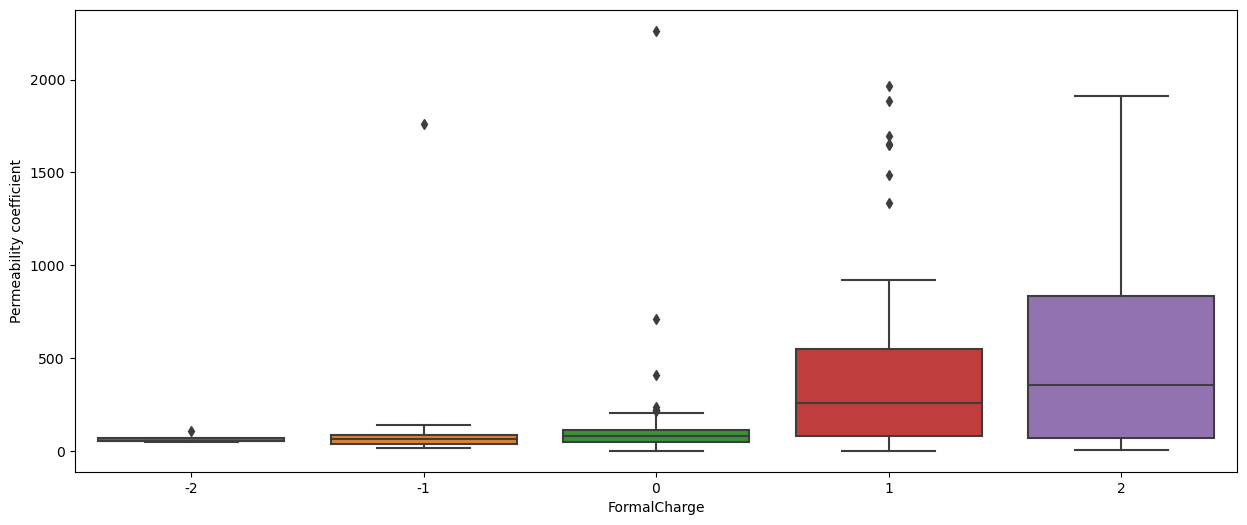

In [62]:
ax = sns.boxplot(data=df_boltzmann, x="FormalCharge", y="Permeability coefficient")
ax

## VOTING

In [63]:
threshold_list = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15]
voting_dict = dict() #only interactions
docking_interaction_dict = dict() #docking properties + interactions 
Saved_features_dict = dict() #saved interaction features after voting 

#### Code to vote with different thresholds

In [64]:
for number in threshold_list:
  #print("TRESHOLD: ", number)
  
  voting_dict[f"threshold_{number}"] = pd.DataFrame(columns=list_left_residue)  
  
  for name in df_boltzmann['name']:

    list_values_row = []
    #list_values_row.append(name)
    #print(name)

    small_data = df[df['name'] == name]
    #print(small_data.shape)

    threshold = small_data.shape[0]/number
    #print(small_data.shape[0], threshold)

    for residue  in list_left_residue: 
      sum_value = small_data[residue].sum()

      if sum_value >= threshold:
        list_values_row.append(1)
      else:
        list_values_row.append(0)
    
    #print(list_values_row)
    voting_dict[f"threshold_{number}"].loc[len(voting_dict[f"threshold_{number}"])] = list_values_row


#### Code to delete interactions which are no longer 1 and 0 (all values 0)

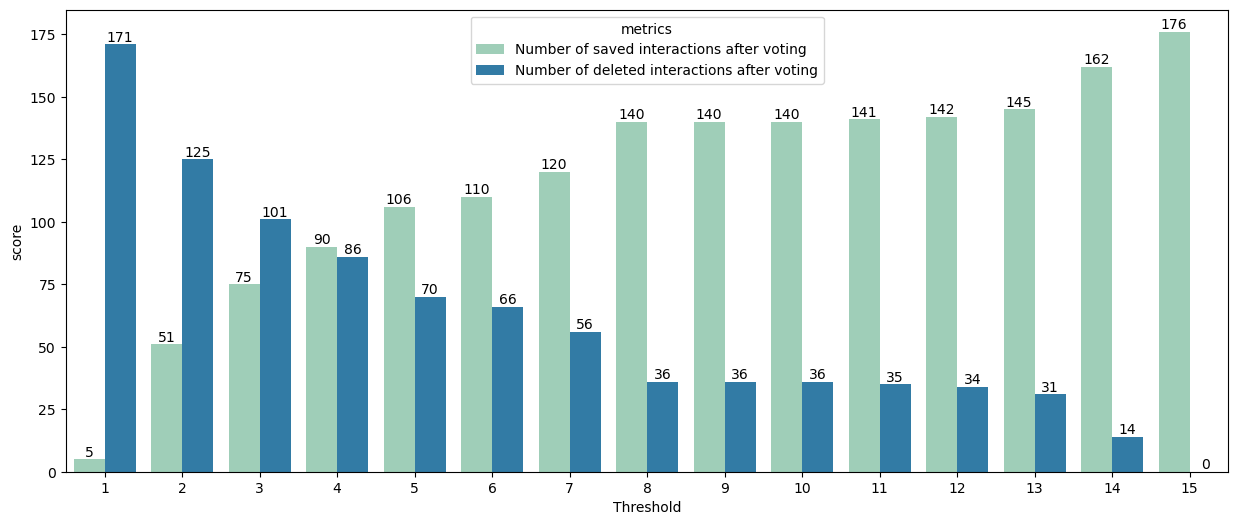

In [65]:
saved_deleted_interactions = pd.DataFrame(columns= ['Threshold' , 'Number of saved interactions after voting' , 'Number of deleted interactions after voting']) 

for number in threshold_list:
  #print("TRESHOLD: ", number)
  
  Saved_features_dict[f"threshold_{number}"] = []
  docking_interaction_dict[f"threshold_{number}"] = pd.DataFrame(columns=list_left_residue)

  myList_delete = []
  myList_save = []

  for residue in list_left_residue:
    sum_value = voting_dict[f"threshold_{number}"][residue].sum()

    if sum_value == 0:
      myList_delete.append(residue)
    else:
      myList_save.append(residue)

  Saved_features_dict[f"threshold_{number}"] = myList_save
  saved_deleted_interactions.loc[len(saved_deleted_interactions)] = [number, len(myList_save), len(myList_delete) ]

  voting_dict[f"threshold_{number}"] = voting_dict[f"threshold_{number}"][myList_save]

  #adding main properties
  docking_interaction_dict[f"threshold_{number}"] = pd.concat([df_boltzmann, voting_dict[f"threshold_{number}"]], axis=1)
  #docking_interaction_dict[f"threshold_{number}"] = pd.get_dummies(docking_interaction_dict[f"threshold_{number}"], columns=['Charge'], drop_first= False, dtype=float)
  docking_interaction_dict[f"threshold_{number}"] = docking_interaction_dict[f"threshold_{number}"].drop(['Charge'], axis =1)

  main_properties = ['name','Permeability coefficient', 'Accumulation_class']

  voting_dict[f"threshold_{number}"] = pd.concat([df_boltzmann[main_properties], voting_dict[f"threshold_{number}"]], axis=1)


plt.rcParams["figure.figsize"] = [15,6]
sns.light_palette("seagreen", as_cmap=True)
g = sns.barplot(
    data=pd.melt(
    saved_deleted_interactions, 
    id_vars= ['Threshold'], 
    value_vars=['Number of saved interactions after voting', 'Number of deleted interactions after voting'], 
    var_name='metrics', 
    value_name='score', 
    col_level=None
),
    x="Threshold", y="score", hue = "metrics", palette="YlGnBu")

g.bar_label(g.containers[1]) 
g.bar_label(g.containers[0]) 
plt.show()   


# EDA (asp113)

In [20]:
asp113 = 'A:113(ASP) '
glu117 = 'A:117(GLU) '

for number in threshold_list: 
    print('THRESHOLD: ', number)   
    features_ASP113 = []
    for feature_p in docking_interaction_dict[f"threshold_{number}"].columns.tolist():
        if feature_p[0:11] == asp113: #CHANGE IF YOU NEED ANOTHER TYPE OF INTERACTION !!!
            features_ASP113.append(feature_p)

    print("Features related to selected type of interaction", features_ASP113)

    asp113_table = docking_interaction_dict[f"threshold_{number}"][features_ASP113]
    #asp113_table

    new_column = []
    for ind_asp in asp113_table.index:
        int_sum = asp113_table.loc[ind_asp, :].sum()
        if int_sum == 0:
            new_column.append('0')
        else:
            new_column.append('1')

    docking_interaction_dict[f"threshold_{number}"]['interaction'] = new_column

    #ax = sns.boxplot(data=docking_interaction_dict[f"threshold_{number}"], x="FormalCharge" , y="Permeability coefficient", hue = 'interaction')
    ax.set(title=f"threshold_{number}")

    docking_interaction_dict[f"threshold_{number}"]= docking_interaction_dict[f"threshold_{number}"].drop(['interaction'], axis= 1)
    #plt.show()

THRESHOLD:  1
Features related to selected type of interaction ['A:113(ASP) HDonor nc']
THRESHOLD:  2
Features related to selected type of interaction ['A:113(ASP) HDonor nc', 'A:113(ASP) HDonor nn', 'A:113(ASP) HDonor cn', 'A:113(ASP) Salt']
THRESHOLD:  3
Features related to selected type of interaction ['A:113(ASP) HDonor nc', 'A:113(ASP) HDonor nn', 'A:113(ASP) HDonor cn', 'A:113(ASP) Salt']
THRESHOLD:  4
Features related to selected type of interaction ['A:113(ASP) HDonor nc', 'A:113(ASP) HDonor nn', 'A:113(ASP) HDonor cn', 'A:113(ASP) Salt']
THRESHOLD:  5
Features related to selected type of interaction ['A:113(ASP) HDonor nc', 'A:113(ASP) HDonor nn', 'A:113(ASP) HDonor cn', 'A:113(ASP) Salt']
THRESHOLD:  6
Features related to selected type of interaction ['A:113(ASP) HDonor nc', 'A:113(ASP) HDonor nn', 'A:113(ASP) HDonor cn', 'A:113(ASP) Salt']
THRESHOLD:  7
Features related to selected type of interaction ['A:113(ASP) HDonor nc', 'A:113(ASP) HDonor cc', 'A:113(ASP) HDonor nn', '

## Deleting correlated features

In [21]:
Corr_methos_saved_features_dict = dict() #saved features(docking properties + interactions) after correlation method
Corr_methos_deleted_features_dict = dict() #deleted features(docking properties + interactions) after correlation method

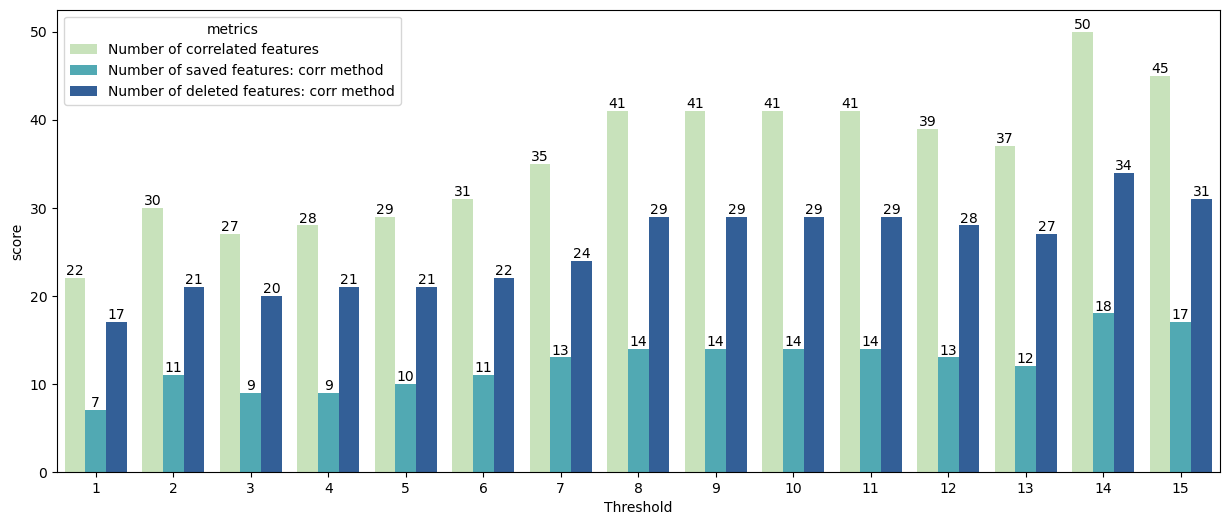

In [66]:
number_correlated_features = []
corr_method_saved_features = []
corr_method_deleted_features = []

for number in threshold_list:

    Corr_methos_saved_features_dict[f"threshold_{number}"] = []
    Corr_methos_deleted_features_dict[f"threshold_{number}"] = []

    #print("THRESHOLD: ", number)
    corr_matrix = docking_interaction_dict[f"threshold_{number}"].drop(['Canonical SMILES', 'name', 'Permeability coefficient',
        'Accumulation_class'], axis= 1).corr()

    corr_matrix_1 = corr_matrix.rename_axis('Feature').reset_index()


    correlation_data = pd.DataFrame(columns = ['Feature1', 'Feature2', 'Correlation coefficient'])
    properties = corr_matrix_1.columns.tolist()

    for feach1 in corr_matrix_1.index:
        for feach2 in properties[1:]:
            corr_coef = corr_matrix_1.loc[feach1, feach2]
            if 0.9 < corr_coef or corr_coef < -0.9:
                if corr_matrix_1.loc[feach1, 'Feature'] != feach2:
                    #correlation_data = correlation_data.append({'Feature1' : corr_matrix_1.loc[feach1, 'Feature'], 
                    # 'Feature2' : feach2, 'Correlation coefficient' : corr_coef}, ignore_index = True)
                    new_row = pd.DataFrame({'Feature1' : corr_matrix_1.loc[feach1, 'Feature'], 
                                        'Feature2' : feach2, 
                                        'Correlation coefficient' : corr_coef}, 
                                        index=[0])
                    correlation_data = pd.concat([new_row,correlation_data.loc[:]]).reset_index(drop=True)
        
    for index_cor in correlation_data.index:
        features = correlation_data.loc[index_cor, :].tolist()
        for index_corr_1 in correlation_data.index:
            features_2 = correlation_data.loc[index_corr_1, :].tolist()
            if features != features_2 and features_2[0] == features[1] and features_2[1] == features[0]:
                #print(features)
                #print('NEW',  features_2)
                #print('STOP')
                #print(index_cor,index_corr_1)
                correlation_data.drop(labels=index_cor, axis=0, inplace=True)
    #correlation_data
    
    imp_res_vot = ['A:42(ARG)','A:113(ASP)', 'A:117(GLU)', 'A:82(ARG)','A:132(ARG)', 'A:16(LYS)', 'A:121(ASP)']
    for index_f in correlation_data.index:
        feature1 = correlation_data.loc[index_f, 'Feature1']
        feature2 = correlation_data.loc[index_f, 'Feature2']
        if feature2.split(" ")[0] in imp_res_vot and feature1.split(" ")[0] not in imp_res_vot:
            #print(feature1,feature2)
            #print(feature2.split(" ")[0])
            #print("YES")
            correlation_data.loc[index_f, 'Feature1'] = feature2
            correlation_data.loc[index_f, 'Feature2'] = feature1
            
        if feature2[0] == 'A' and feature1[0] != 'A':
            #print(feature1,feature2)
            #print("YEEES")
            correlation_data.loc[index_f, 'Feature1'] = feature2
            correlation_data.loc[index_f, 'Feature2'] = feature1
            
        if feature2 == 'FormalCharge' and feature1 not in imp_res_vot:
            #print(feature1,feature2)
            #print("YEEESsss")
            correlation_data.loc[index_f, 'Feature1'] = feature2
            correlation_data.loc[index_f, 'Feature2'] = feature1

    feach1_list = correlation_data['Feature1'].unique().tolist()
    for item in correlation_data['Feature2'].unique().tolist():
        if item not in feach1_list:
            feach1_list.append(item)

    #print('Number of correlated features ', len(feach1_list))
    number_correlated_features.append(len(feach1_list))

    deleted_features = []
    saved_features = []
    deleted_indexes = []

    for index_f in correlation_data.index:
        #print(index_f)
        if index_f not in deleted_indexes:
            feature1 = correlation_data.loc[index_f, 'Feature1']
            feature2 = correlation_data.loc[index_f, 'Feature2']
            #print('Feature1: ',feature1)
            #print('Feature2: ',feature2)
            if feature2 not in deleted_features: 
                deleted_features.append(feature2)

            other_feach_list = correlation_data['Feature2'].tolist()[1:]
            #print(other_feach_list)
            correlation_data.drop(labels=index_f, axis=0, inplace=True)
            deleted_indexes.append(index_f)

            if feature1 in other_feach_list:
                #print('yes: feature is repeated')
                while (feature1 in other_feach_list): 
                    ind = correlation_data[correlation_data['Feature2'] == feature1].index[0]
                    #print(ind)
                    if feature1 not in deleted_features: 
                        deleted_features.append(feature1)
                    feature1 = correlation_data.loc[ind, 'Feature1']
                    #print('New feature1: ', feature1)
                    correlation_data.drop(labels=ind, axis=0, inplace=True)
                    deleted_indexes.append(ind)

                if feature1 not in saved_features:
                    saved_features.append(feature1)
            
            else:
                if feature1 not in deleted_features and feature1 not in saved_features:
                    saved_features.append(feature1)

            #print('SAVED FEATURES', saved_features)
            #print('DELETED FEATURES', deleted_features)
            #print('DELETED INDEXES', deleted_indexes)

    #print('SAVED FEATURES' , len(saved_features), saved_features)
    #print('DELETED FEATURES', len(deleted_features), deleted_features)

    corr_method_saved_features.append(len(saved_features))
    corr_method_deleted_features.append(len(deleted_features)) 

    Corr_methos_saved_features_dict[f"threshold_{number}"] = saved_features
    Corr_methos_deleted_features_dict[f"threshold_{number}"] = deleted_features

saved_deleted_interactions['Number of correlated features'] = number_correlated_features
saved_deleted_interactions['Number of saved features: corr method'] = corr_method_saved_features
saved_deleted_interactions['Number of deleted features: corr method'] = corr_method_deleted_features


plt.rcParams["figure.figsize"] = [15,6]
sns.light_palette("seagreen", as_cmap=True)
g = sns.barplot(
    data=pd.melt(
    saved_deleted_interactions, 
    id_vars= ['Threshold'], 
    value_vars=['Number of correlated features',
 'Number of saved features: corr method',
 'Number of deleted features: corr method'], 
    var_name='metrics', 
    value_name='score', 
    col_level=None
),
    x="Threshold", y="score", hue = "metrics", palette="YlGnBu")

g.bar_label(g.containers[1]) 
g.bar_label(g.containers[0]) 
g.bar_label(g.containers[2]) 
plt.show()   

In [67]:
print(Corr_methos_saved_features_dict["threshold_1"])
print(Corr_methos_deleted_features_dict["threshold_1"])

['FormalCharge', 'res:A132 coul', 'res:A132 Eint', 'res:A117 dist', 'glide emodel', 'glide ligand efficiency', 'docking score']
['res:A16 Eint', 'res:A16 coul', 'res:A42 Eint', 'res:A42 coul', 'res:A82 Eint', 'res:A82 coul', 'res:A132 Eint', 'res:A132 coul', 'res:A113 Eint', 'res:A113 coul', 'res:A117 Eint', 'res:A117 coul', 'res:A113 dist', 'glide energy', 'glide gscore', 'glide ligand efficiency ln', 'glide ligand efficiency sa']


In [68]:
number_feature_before_voting = len(df_boltzmann.columns.tolist()) - 5 + len(df_boltzmann['Charge'].unique().tolist()) + 176
saved_deleted_interactions["Number of features left"] = number_feature_before_voting - saved_deleted_interactions["Number of deleted interactions after voting"] - saved_deleted_interactions["Number of deleted features: corr method"]
saved_deleted_interactions

,Threshold,Number of saved interactions after voting,Number of deleted interactions after voting,Number of correlated features,Number of saved features: corr method,Number of deleted features: corr method,Number of features left
0,1,5,171,22,7,17,43
1,2,51,125,30,11,21,85
2,3,75,101,27,9,20,110
3,4,90,86,28,9,21,124
4,5,106,70,29,10,21,140
5,6,110,66,31,11,22,143
6,7,120,56,35,13,24,151
7,8,140,36,41,14,29,166
8,9,140,36,41,14,29,166
9,10,140,36,41,14,29,166


# Scaling

In [69]:
for number in threshold_list:
       
    columns_to_drop = ['Canonical SMILES', 'name', 'Permeability coefficient', 'Accumulation_class']

    df_pca = docking_interaction_dict[f"threshold_{number}"].drop(columns_to_drop, axis= 1)

    #sc = StandardScaler()
    sc = MinMaxScaler()
    df_pca_transformed = sc.fit_transform(df_pca)

    scaled_data = pd.DataFrame(df_pca_transformed, columns = list(df_pca.columns))

    docking_interaction_dict[f"threshold_{number}"] =  pd.concat([docking_interaction_dict[f"threshold_{number}"][columns_to_drop], scaled_data], axis=1)

## Models

In [70]:
#classification model
X_class_dict = dict()
Y_class_dict = dict()

for number in threshold_list:

    #new column for classification model
    docking_interaction_dict[f"threshold_{number}"]['Permiation'] = [0 if x == 'Low' else 1 for x in docking_interaction_dict[f"threshold_{number}"]['Accumulation_class']]

    X_class_dict[f"threshold_{number}"] = docking_interaction_dict[f"threshold_{number}"].drop(['Canonical SMILES', 'name', 'Permeability coefficient', 'Accumulation_class', 'Permiation'], axis= 1)
    Y_class_dict[f"threshold_{number}"] = docking_interaction_dict[f"threshold_{number}"]['Permiation']

In [71]:
models = [['SVM', svm.SVC()], 
          ['Random Forest', RandomForestClassifier()], 
          ['Decision Tree', DecisionTreeClassifier()],
          ['KNeighbors', KNeighborsClassifier(n_neighbors=3)], 
          ['LogisticRegression', LogisticRegression()]
          ]

def confusion_matrix_function(XXX, yyy, selected_features_mod, test_size):
    dict_test_train = {}
    for test_size_x in [test_size]:
        X_train, X_test, y_train, y_test = train_test_split(XXX, 
                                                        yyy, test_size=test_size_x, 
                                                        stratify=yyy, shuffle = True)
        #print(test_size_x)

        for name, classifier in models:
            #print(name)
            model = classifier
            model.fit(X_train, y_train)
            preds = model.predict(X_test)
            confmat = confusion_matrix(y_test, preds)

            #confusion matrix
            fig, axes = plt.subplots(1, 3, figsize=(18, 4))
            fig.suptitle(name, fontsize=16, x = 0)

            plot_confusion_matrix(conf_mat=confmat,
                                    show_absolute=True,
                                    show_normed=True,
                                    colorbar=False, axis = axes[1], figure = fig)
        

            #model with selected features

            X_train_sel = X_train[selected_features_mod]   
            X_test_sel = X_test[selected_features_mod] 

            model1 = classifier
            model1.fit(X_train_sel, y_train)
            preds_sel = model1.predict(X_test_sel)
            confmat_sel = confusion_matrix(y_test, preds_sel)
    
            plot_confusion_matrix(conf_mat=confmat_sel,
                                    show_absolute=True,
                                    show_normed=True,
                                    colorbar=True, axis = axes[2], figure = fig )  
            
            #other metrics

            #standart accuracy 
            accuracy_all = round(accuracy_score(y_test, preds), 3)
            accuracy_sel = round(accuracy_score(y_test, preds_sel), 3)

            #balanced accuracy
            bal_acc_all = round(balanced_accuracy_score(y_test,preds), 3)
            bal_acc_sel = round(balanced_accuracy_score(y_test,preds_sel), 3)

            #recall
            recall_score_all = round(recall_score(y_test, preds, average='weighted'), 3)
            recall_score_sel = round(recall_score(y_test, preds_sel, average='weighted'), 3)

            #precision
            precision_all = round(precision_score(y_test, preds, zero_division = 1), 3)
            precision_sel = round(precision_score(y_test, preds_sel, zero_division = 1), 3)

            #ROC
            ROC_all = round(roc_auc_score(y_test, preds), 3)
            ROC_sel = round(roc_auc_score(y_test, preds_sel), 3)

            dict_metrics = {}
            dict_metrics[name + "_all"] = accuracy_all, bal_acc_all, recall_score_all, precision_all, ROC_all
            dict_metrics[name + "_sel"] = accuracy_sel, bal_acc_sel, recall_score_sel, precision_sel, ROC_sel

            metrics_dataframe = pd.DataFrame.from_dict(dict_metrics, orient='index',
                        columns=['Standart accuracy', 'Balanced accuracy', 'Recall', 'Precision', 'ROC'])
            new_metrics_dataframe = metrics_dataframe.rename_axis('Method').reset_index()
            melt_train_test = pd.melt(new_metrics_dataframe, 
                                    id_vars= ['Method'], 
                                    value_vars=('Standart accuracy', 'Balanced accuracy', 'Recall', 'Precision', 'ROC'), 
                                    var_name='metrics', 
                                    value_name='score', 
                                    col_level=None
                                    )
            #print(melt_train_test)


            param = sns.barplot(data = melt_train_test, x = 'Method', y = 'score', hue = 'metrics', ax = axes[0])
            param.legend(loc='upper left', bbox_to_anchor=(-0.7, 1))
            #plt.legend(loc='upper left', bbox_to_anchor=(-1, 1))
            


            #print('Standart accuracy', accuracy_all, accuracy_sel)
            #print('Balanced accuracy', bal_acc_all, bal_acc_sel)
            #print('F1 score', f1_score_all, f1_score_sel)
            #print('Precision', precision_all, precision_sel) 
            #print('ROC', ROC_all, ROC_sel) 
            #print(dict_metrics)

            
            
            axes[1].set_title('all features')
            axes[2].set_title('selected features')

            plt.show()


In [77]:
# Open the file for reading
with open("/Users/sashaolshanova/GramNegative-Accumulation/Gram Negative Permeation - OmpF/Corr_Var_methos_saved_features_dict.txt", "r") as fp:
    # Load the dictionary from the file
    Corr_Var_methos_saved_features_dict = json.load(fp)

# Print the contents of the dictionary
Corr_Var_methos_saved_features_dict['threshold_1']

['res:A16 hbond',
 'res:A132 hbond',
 'glide lipo',
 'res:A117 hbond',
 'FormalCharge',
 'res:A113 hbond']

In [31]:
ompF_features= ['res:A132 coul', 'res:A113 hbond', 'res:A16 dist', 'A:113(ASP) HDonor nc', 'A:113(ASP) Salt', 'A:132(ARG) HAccep cn', 'A:132(ARG) HAccep nn', 'A:132(ARG) Salt', 'A:16(LYS) HAccep cn', 'A:310(TYR) HPhob', 'A:40(TYR) HPhob', 'A:42(ARG) HAccep cn', 'A:42(ARG) HAccep nn', 'A:82(ARG) HAccep cn', 'A:82(ARG) HAccep nn', 'A:82(ARG) HAccep nc', 'A:82(ARG) Salt']
ompF_features

['res:A132 coul',
 'res:A113 hbond',
 'res:A16 dist',
 'A:113(ASP) HDonor nc',
 'A:113(ASP) Salt',
 'A:132(ARG) HAccep cn',
 'A:132(ARG) HAccep nn',
 'A:132(ARG) Salt',
 'A:16(LYS) HAccep cn',
 'A:310(TYR) HPhob',
 'A:40(TYR) HPhob',
 'A:42(ARG) HAccep cn',
 'A:42(ARG) HAccep nn',
 'A:82(ARG) HAccep cn',
 'A:82(ARG) HAccep nn',
 'A:82(ARG) HAccep nc',
 'A:82(ARG) Salt']

Selected features:  26
['A:102(TYR) HPhob', 'A:106(TYR) HPhob', 'A:113(ASP) HDonor nn', 'A:113(ASP) HDonor cn', 'A:117(GLU) HDonor nn', 'A:117(GLU) HDonor cn', 'A:118(PHE) HPhob', 'A:119(GLY) HDonor nn', 'A:123(ALA) HPhob', 'A:124(TYR) HPhob', 'A:125(SER) HAccep nn', 'A:125(SER) HAccep nc', 'A:132(ARG) HAccep nc', 'A:132(ARG) HAccep cc', 'A:16(LYS) HAccep cc', 'A:16(LYS) Salt', 'A:167(ARG) Salt', 'A:168(ARG) Salt', 'A:20(LEU) HPhob', 'A:310(TYR) HPhob', 'A:38(MET) HPhob', 'A:40(TYR) HPhob', 'A:80(LYS) HAccep cn', 'A:80(LYS) HAccep cc', 'A:80(LYS) Salt', 'FormalCharge']


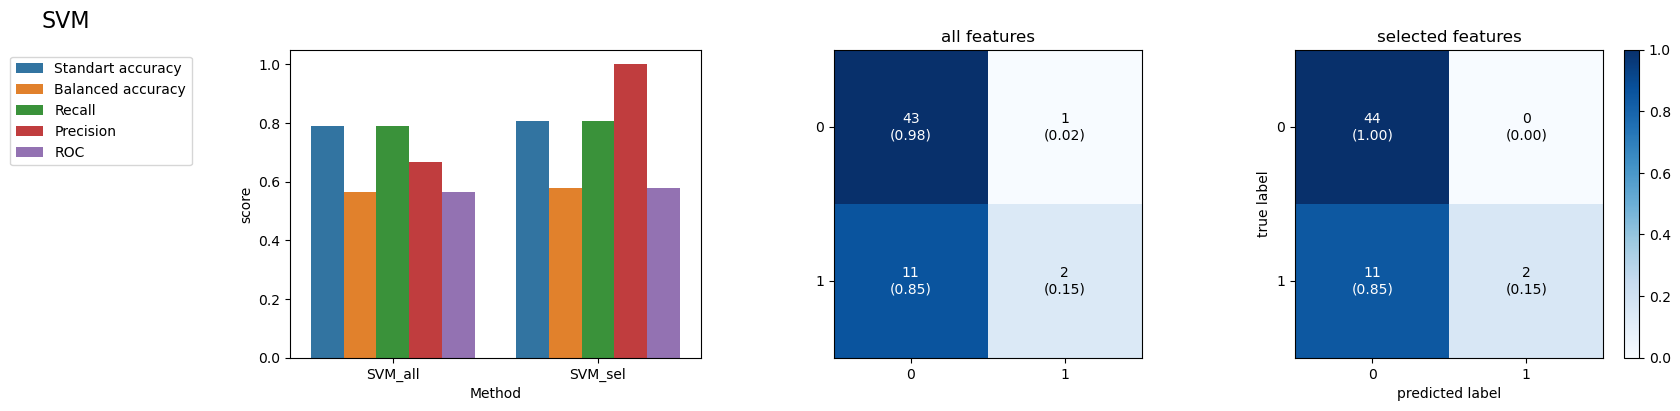

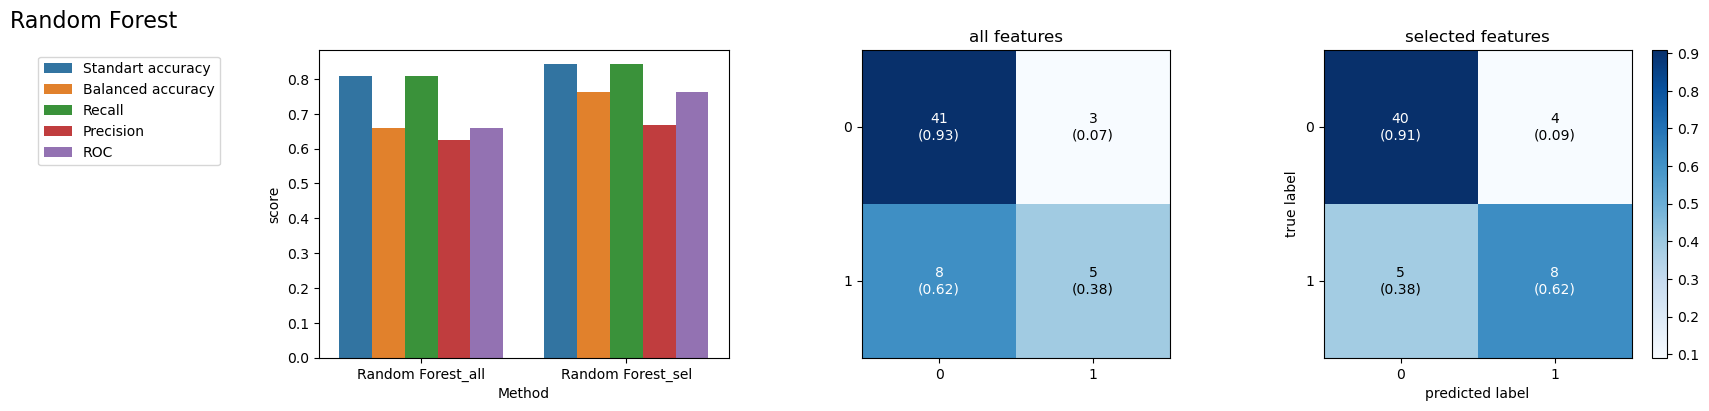

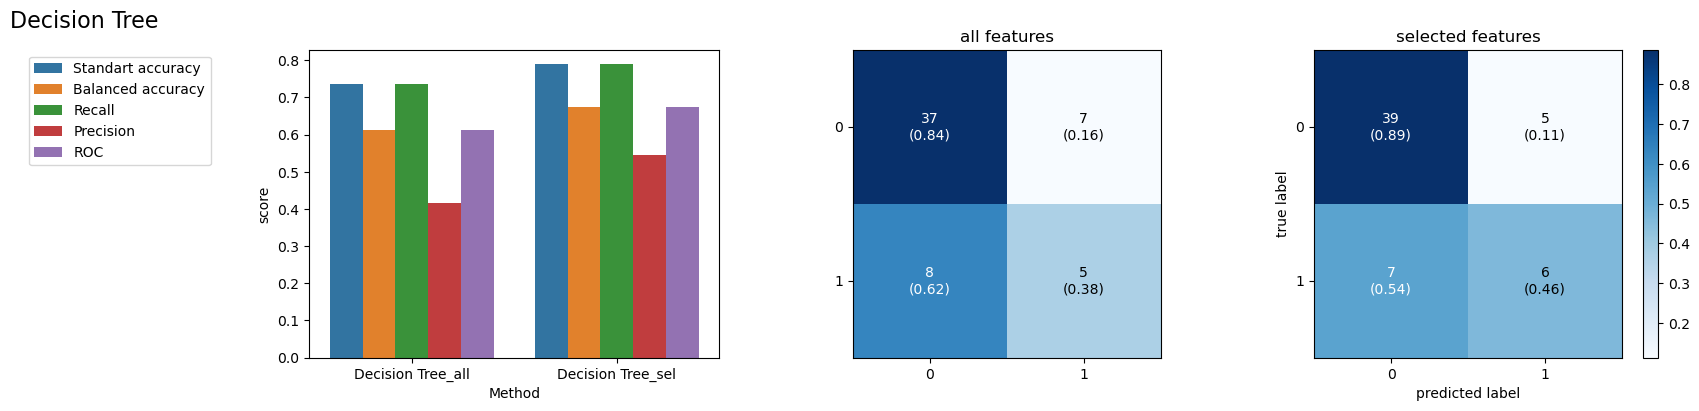

/Users/sashaolshanova/opt/anaconda3/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
/Users/sashaolshanova/opt/anaconda3/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to T

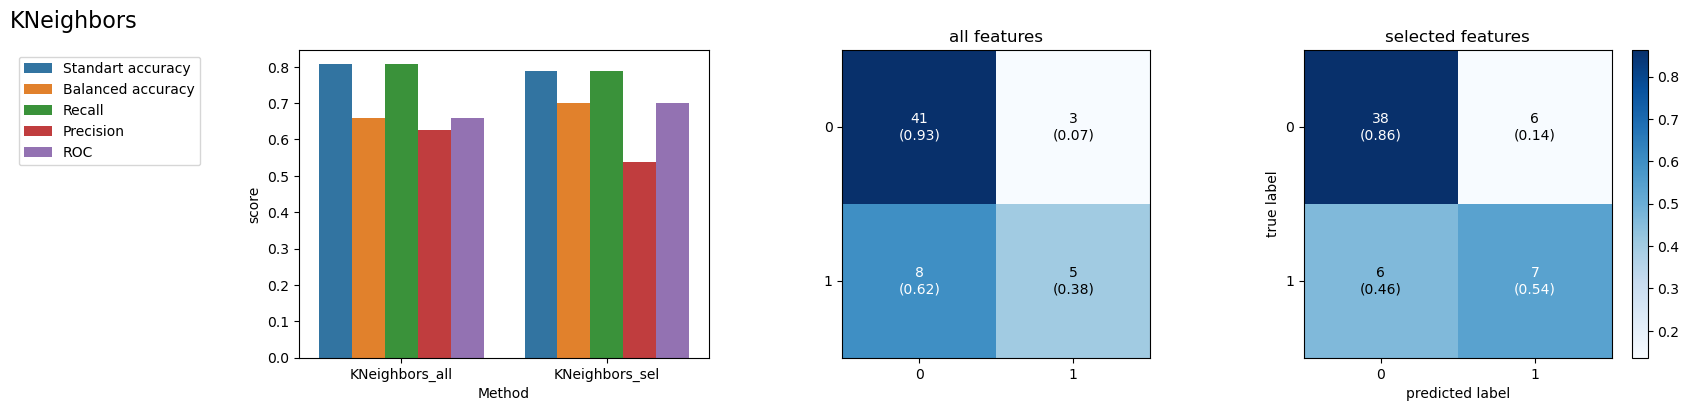

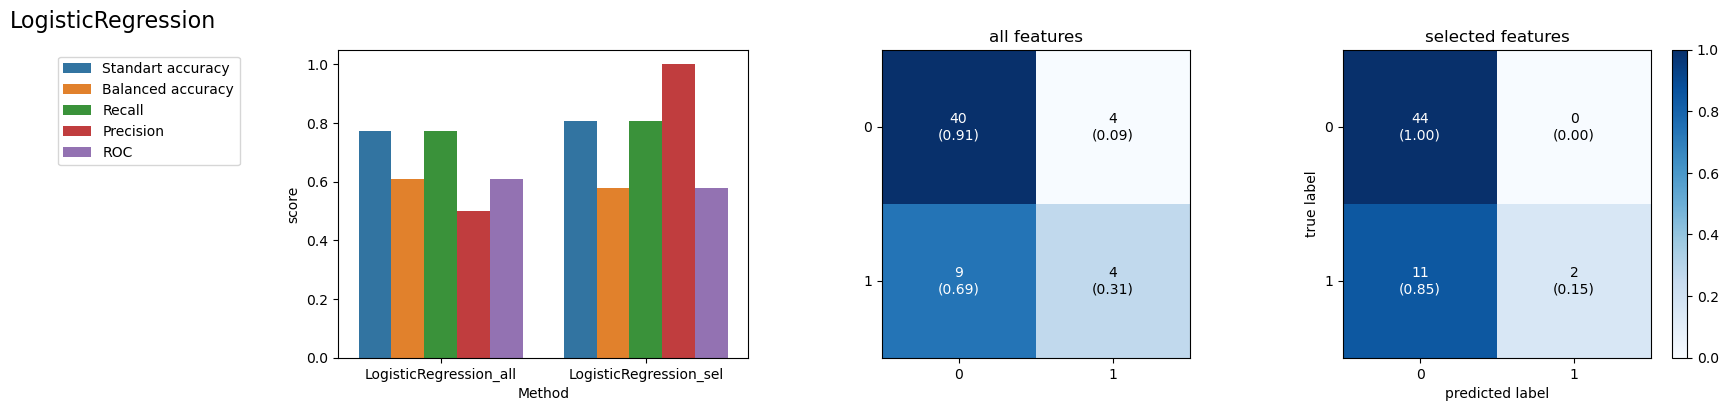

In [85]:
selected_treshold = [15]
for number in selected_treshold:
#    select_features = X_class_dict[f"threshold_{number}"].drop(Corr_methos_deleted_features_dict[f"threshold_{number}"], axis= 1).columns.tolist()
    #.drop(Corr_methos_deleted_features_dict[f"threshold_{number}"], axis= 1).columns.tolist()

#Corr_Var_methos_saved_features_dict[f"threshold_{number}"]: SELECTED FEATURES BASED ON SMALL DATASET (each threshold has its own features)
#ompF_features: SELECTED FEATURES BASED ON OMF_features (first implemented approach)

    explored_set_features = ompF_features  #change if want to explore another set 

    select_features = []
    for features_all in X_class_dict[f"threshold_{number}"].columns.tolist():
        if features_all in explored_set_features:
            select_features.append(features_all)
    if "FormalCharge" not in select_features:
      select_features.insert(0, "FormalCharge")
    
    
    #select_features = select_features + alvadesc_feach.columns.tolist()[2:]
    print("Selected features: ", len(select_features))
    print(select_features)

    confusion_matrix_function(X_class_dict[f"threshold_{number}"], Y_class_dict[f"threshold_{number}"], select_features, 0.3)

In [28]:
dict_metrics = {}

for number in threshold_list:
    #print('THRESOLD: ', number)
    
    for test_size_x in [0.3]:
        X_train, X_test, y_train, y_test = train_test_split(X_class_dict[f"threshold_{number}"], 
                                                        Y_class_dict[f"threshold_{number}"], test_size= test_size_x, 
                                                        stratify=Y_class_dict[f"threshold_{number}"], shuffle = True)
        #print(test_size_x)

        for name, classifier in models:
            #print(name)
            model = classifier
            model.fit(X_train, y_train)
            preds = model.predict(X_test)

            #model with selected features (after correlation method)
            #selected_features_mod = X_class_dict[f"threshold_{number}"].drop(Corr_methos_deleted_features_dict[f"threshold_{number}"], axis= 1).columns.tolist()
            
            #model with selected features (after OmpF small data)
            selected_features_mod = []
            for features_all in X_class_dict[f"threshold_{number}"].columns.tolist():
                if features_all in ompF_features:
                    selected_features_mod.append(features_all)
            #charge is important!
            selected_features_mod.append("FormalCharge")

            X_train_sel = X_train[selected_features_mod]   
            X_test_sel = X_test[selected_features_mod] 

            model1 = classifier
            model1.fit(X_train_sel, y_train)
            preds_sel = model1.predict(X_test_sel)
            
            #METRICS

            #standart accuracy 
            accuracy_all = round(accuracy_score(y_test, preds), 3)
            accuracy_sel = round(accuracy_score(y_test, preds_sel), 3)

            #balanced accuracy
            bal_acc_all = round(balanced_accuracy_score(y_test,preds), 3)
            bal_acc_sel = round(balanced_accuracy_score(y_test,preds_sel), 3)

            #recall score

            recall_score_all = round(recall_score(y_test, preds, average='weighted'), 3)
            recall_score_sel = round(recall_score(y_test, preds_sel, average='weighted'), 3)

            #precision
            precision_all = round(precision_score(y_test, preds, zero_division = 1), 3)
            precision_sel = round(precision_score(y_test, preds_sel, zero_division = 1), 3)

            #ROC
            ROC_all = round(roc_auc_score(y_test, preds), 3)
            ROC_sel = round(roc_auc_score(y_test, preds_sel), 3)

            
            dict_metrics["Thresold_" + str(number) + "_" + name + "_all"] = str(number), name, 'all', accuracy_all, bal_acc_all, recall_score_all, precision_all, ROC_all
            dict_metrics["Thresold_" + str(number) + "_" + name + "_selected"] = str(number), name, 'selected features' , accuracy_sel, bal_acc_sel, recall_score_sel, precision_sel, ROC_sel

            #print('Standart accuracy', accuracy_all, accuracy_sel)
            #print('Balanced accuracy', bal_acc_all, bal_acc_sel)
            #print('F1 score', f1_score_all, f1_score_sel)
            #print('Precision', precision_all, precision_sel) 
            #print('ROC', ROC_all, ROC_sel) 
            
metrics_dataframe = pd.DataFrame.from_dict(dict_metrics, orient='index', columns=['Threshold', 'Model','Number of features', 'Standart accuracy', 'Balanced accuracy', 'Recall', 'Precision', 'ROC'])
new_metrics_dataframe = metrics_dataframe.rename_axis('Method').reset_index()
new_metrics_dataframe


/Users/sashaolshanova/opt/anaconda3/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
/Users/sashaolshanova/opt/anaconda3/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to T

,Method,Threshold,Model,Number of features,Standart accuracy,Balanced accuracy,Recall,Precision,ROC
0,Thresold_1_SVM_all,1,SVM,all,0.825,0.724,0.825,0.636,0.724
1,Thresold_1_SVM_selected,1,SVM,selected features,0.772,0.500,0.772,1.000,0.500
2,Thresold_1_Random Forest_all,1,Random Forest,all,0.825,0.670,0.825,0.714,0.670
3,Thresold_1_Random Forest_selected,1,Random Forest,selected features,0.702,0.509,0.702,0.250,0.509
4,Thresold_1_Decision Tree_all,1,Decision Tree,all,0.737,0.586,0.737,0.400,0.586
...,...,...,...,...,...,...,...,...,...
145,Thresold_15_Decision Tree_selected,15,Decision Tree,selected features,0.754,0.705,0.754,0.471,0.705
146,Thresold_15_KNeighbors_all,15,KNeighbors,all,0.807,0.794,0.807,0.556,0.794
147,Thresold_15_KNeighbors_selected,15,KNeighbors,selected features,0.737,0.586,0.737,0.400,0.586
148,Thresold_15_LogisticRegression_all,15,LogisticRegression,all,0.825,0.751,0.825,0.615,0.751


In [107]:
for name, classifier in models:
    fig, axes = plt.subplots(2, 2, figsize=(13, 6))
    fig.suptitle(name)
    print(name)
    sns.lineplot(ax=axes[0, 0], data=new_metrics_dataframe[new_metrics_dataframe['Model']== name], 
                      x="Threshold", y="Balanced accuracy", hue = 'Number of features',style ='Number of features',
                      markers=True, dashes=False)
    
    sns.lineplot(ax=axes[0, 1], data=new_metrics_dataframe[new_metrics_dataframe['Model']== name], 
                      x="Threshold", y="Recall", hue = 'Number of features',style ='Number of features',
                      markers=True, dashes=False)   
    
    sns.lineplot(ax=axes[1, 0], data=new_metrics_dataframe[new_metrics_dataframe['Model']== name], 
                      x="Threshold", y="Precision", hue = 'Number of features',style ='Number of features',
                      markers=True, dashes=False) 
    
    sns.lineplot(ax=axes[1, 1], data=new_metrics_dataframe[new_metrics_dataframe['Model']== name], 
                      x="Threshold", y="ROC", hue = 'Number of features',style ='Number of features',
                      markers=True, dashes=False) 
    
    plt.show()

SVM


KeyError: 'Model'

Error in callback <function flush_figures at 0x7fbc9c0faca0> (for post_execute):


KeyboardInterrupt: 

['res:A132 coul', 'res:A113 hbond', 'res:A16 dist', 'A:113(ASP) HDonor nc', 'A:113(ASP) Salt', 'A:132(ARG) HAccep cn', 'A:132(ARG) HAccep nn', 'A:132(ARG) Salt', 'A:16(LYS) HAccep cn', 'A:310(TYR) HPhob', 'A:40(TYR) HPhob', 'A:42(ARG) HAccep cn', 'A:42(ARG) HAccep nn', 'A:82(ARG) HAccep cn', 'A:82(ARG) HAccep nn', 'A:82(ARG) HAccep nc', 'A:82(ARG) Salt', 'FormalCharge']
Decision Tree


/Users/sashaolshanova/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names


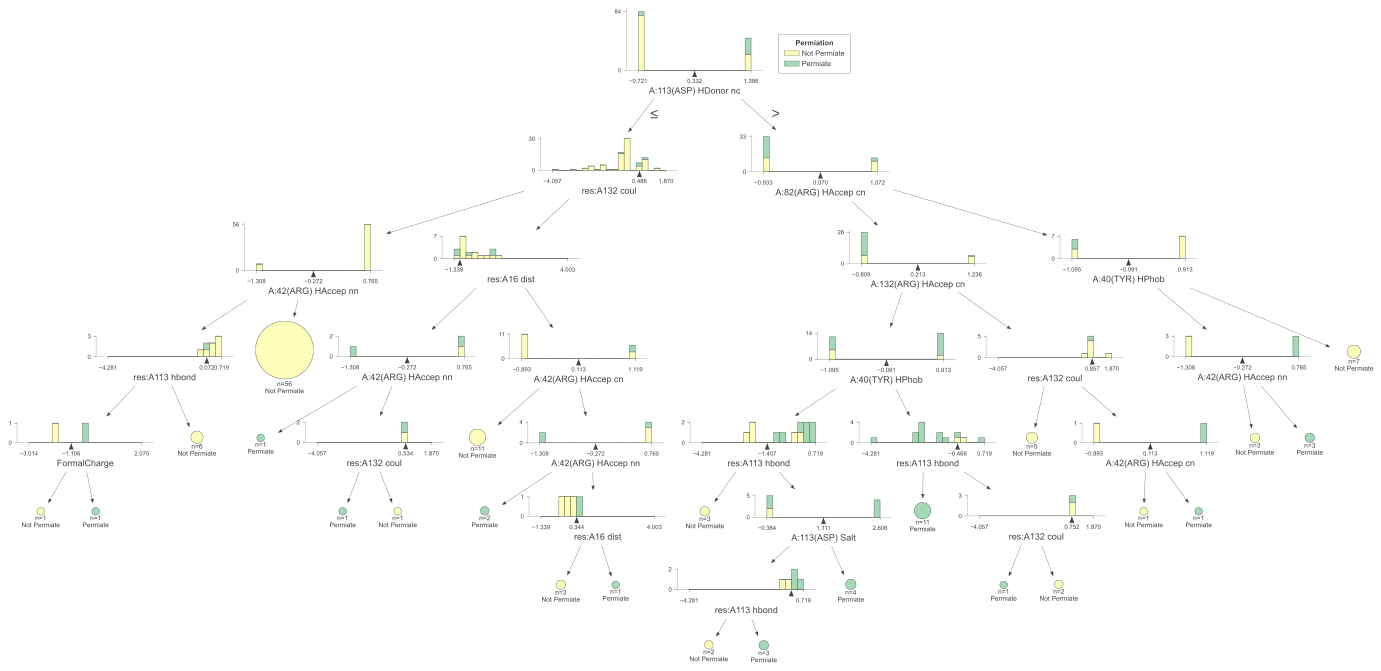

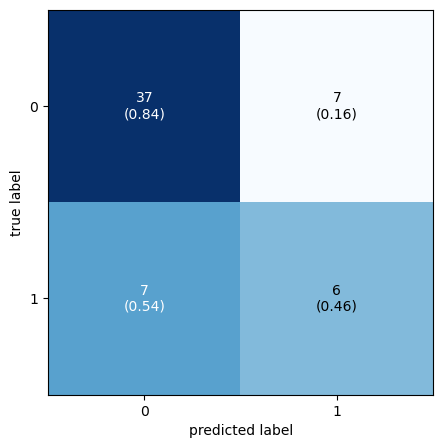

In [78]:
threshold_list = [13]

for number in threshold_list:
    #print('THRESOLD: ', number)
    select_features = []
    for features_all in X_class_dict[f"threshold_{number}"].columns.tolist():
        if features_all in ompF_features:
            select_features.append(features_all)
    select_features.append("FormalCharge")
    #select_features.remove('A:113(ASP) HDonor nc')
    #select_features.remove('res:A132 coul')
    #select_features.remove("FormalCharge")
    print(select_features)
    
    
    for test_size_x in [0.3]:
        X_train, X_test, y_train, y_test = train_test_split(X_class_dict[f"threshold_{number}"][select_features], 
                                                        Y_class_dict[f"threshold_{number}"], test_size= test_size_x, 
                                                        random_state=42, stratify=Y_class_dict[f"threshold_{number}"], shuffle = True)
        #print(test_size_x)

        for name, model in models:
            if name == 'Decision Tree':
                print(name)
                model.fit(X_train, y_train)

                #plot_tree(model, filled=True, rounded=True) 
                #plt.show()
                viz_model = dtreeviz.model(model,
                            X_train=X_train, y_train=y_train,
                            feature_names=X_train.columns,
                            target_name='Permiation',
                            class_names=['Not Permiate', 'Permiate'],)
                
                preds = model.predict(X_test)
                confmat = confusion_matrix(y_test, preds)
                plot_confusion_matrix(conf_mat=confmat,
                                    show_absolute=True,
                                    show_normed=True,
                                    colorbar=False)


            

viz_model.view()
            

# Cross fold validation

In [72]:
models

[['SVM', SVC()],
 ['Random Forest', RandomForestClassifier()],
 ['Decision Tree', DecisionTreeClassifier()],
 ['KNeighbors', KNeighborsClassifier(n_neighbors=3)],
 ['LogisticRegression', LogisticRegression()]]

In [73]:
folds_names = []
number_of_folds = 7
for i in range(number_of_folds):
    folds_names.append(f"fold_{i+1}")

boxplot_cross_val = pd.DataFrame(columns = ["Model", "Threshold", "Metric"] + folds_names)
boxplot_cross_val

,Model,Threshold,Metric,fold_1,fold_2,fold_3,fold_4,fold_5,fold_6,fold_7


Selected features:  6
['res:A132 coul', 'res:A113 hbond', 'res:A16 dist', 'A:113(ASP) HDonor nc', 'A:40(TYR) HPhob', 'FormalCharge']


/Users/sashaolshanova/opt/anaconda3/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
/Users/sashaolshanova/opt/anaconda3/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to T

Selected features:  17
['res:A132 coul', 'res:A113 hbond', 'res:A16 dist', 'A:113(ASP) HDonor nc', 'A:113(ASP) Salt', 'A:132(ARG) HAccep cn', 'A:132(ARG) HAccep nn', 'A:132(ARG) Salt', 'A:16(LYS) HAccep cn', 'A:310(TYR) HPhob', 'A:40(TYR) HPhob', 'A:42(ARG) HAccep cn', 'A:42(ARG) HAccep nn', 'A:82(ARG) HAccep cn', 'A:82(ARG) HAccep nn', 'A:82(ARG) Salt', 'FormalCharge']


/Users/sashaolshanova/opt/anaconda3/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
/Users/sashaolshanova/opt/anaconda3/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to T

Selected features:  18
['res:A132 coul', 'res:A113 hbond', 'res:A16 dist', 'A:113(ASP) HDonor nc', 'A:113(ASP) Salt', 'A:132(ARG) HAccep cn', 'A:132(ARG) HAccep nn', 'A:132(ARG) Salt', 'A:16(LYS) HAccep cn', 'A:310(TYR) HPhob', 'A:40(TYR) HPhob', 'A:42(ARG) HAccep cn', 'A:42(ARG) HAccep nn', 'A:82(ARG) HAccep cn', 'A:82(ARG) HAccep nn', 'A:82(ARG) HAccep nc', 'A:82(ARG) Salt', 'FormalCharge']


/Users/sashaolshanova/opt/anaconda3/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
/Users/sashaolshanova/opt/anaconda3/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to T

Selected features:  18
['res:A132 coul', 'res:A113 hbond', 'res:A16 dist', 'A:113(ASP) HDonor nc', 'A:113(ASP) Salt', 'A:132(ARG) HAccep cn', 'A:132(ARG) HAccep nn', 'A:132(ARG) Salt', 'A:16(LYS) HAccep cn', 'A:310(TYR) HPhob', 'A:40(TYR) HPhob', 'A:42(ARG) HAccep cn', 'A:42(ARG) HAccep nn', 'A:82(ARG) HAccep cn', 'A:82(ARG) HAccep nn', 'A:82(ARG) HAccep nc', 'A:82(ARG) Salt', 'FormalCharge']


/Users/sashaolshanova/opt/anaconda3/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
/Users/sashaolshanova/opt/anaconda3/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to T

Selected features:  18
['res:A132 coul', 'res:A113 hbond', 'res:A16 dist', 'A:113(ASP) HDonor nc', 'A:113(ASP) Salt', 'A:132(ARG) HAccep cn', 'A:132(ARG) HAccep nn', 'A:132(ARG) Salt', 'A:16(LYS) HAccep cn', 'A:310(TYR) HPhob', 'A:40(TYR) HPhob', 'A:42(ARG) HAccep cn', 'A:42(ARG) HAccep nn', 'A:82(ARG) HAccep cn', 'A:82(ARG) HAccep nn', 'A:82(ARG) HAccep nc', 'A:82(ARG) Salt', 'FormalCharge']


/Users/sashaolshanova/opt/anaconda3/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
/Users/sashaolshanova/opt/anaconda3/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to T

Selected features:  18
['res:A132 coul', 'res:A113 hbond', 'res:A16 dist', 'A:113(ASP) HDonor nc', 'A:113(ASP) Salt', 'A:132(ARG) HAccep cn', 'A:132(ARG) HAccep nn', 'A:132(ARG) Salt', 'A:16(LYS) HAccep cn', 'A:310(TYR) HPhob', 'A:40(TYR) HPhob', 'A:42(ARG) HAccep cn', 'A:42(ARG) HAccep nn', 'A:82(ARG) HAccep cn', 'A:82(ARG) HAccep nn', 'A:82(ARG) HAccep nc', 'A:82(ARG) Salt', 'FormalCharge']


/Users/sashaolshanova/opt/anaconda3/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
/Users/sashaolshanova/opt/anaconda3/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to T

Selected features:  18
['res:A132 coul', 'res:A113 hbond', 'res:A16 dist', 'A:113(ASP) HDonor nc', 'A:113(ASP) Salt', 'A:132(ARG) HAccep cn', 'A:132(ARG) HAccep nn', 'A:132(ARG) Salt', 'A:16(LYS) HAccep cn', 'A:310(TYR) HPhob', 'A:40(TYR) HPhob', 'A:42(ARG) HAccep cn', 'A:42(ARG) HAccep nn', 'A:82(ARG) HAccep cn', 'A:82(ARG) HAccep nn', 'A:82(ARG) HAccep nc', 'A:82(ARG) Salt', 'FormalCharge']


/Users/sashaolshanova/opt/anaconda3/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
/Users/sashaolshanova/opt/anaconda3/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to T

Selected features:  18
['res:A132 coul', 'res:A113 hbond', 'res:A16 dist', 'A:113(ASP) HDonor nc', 'A:113(ASP) Salt', 'A:132(ARG) HAccep cn', 'A:132(ARG) HAccep nn', 'A:132(ARG) Salt', 'A:16(LYS) HAccep cn', 'A:310(TYR) HPhob', 'A:40(TYR) HPhob', 'A:42(ARG) HAccep cn', 'A:42(ARG) HAccep nn', 'A:82(ARG) HAccep cn', 'A:82(ARG) HAccep nn', 'A:82(ARG) HAccep nc', 'A:82(ARG) Salt', 'FormalCharge']


/Users/sashaolshanova/opt/anaconda3/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
/Users/sashaolshanova/opt/anaconda3/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to T

Selected features:  18
['res:A132 coul', 'res:A113 hbond', 'res:A16 dist', 'A:113(ASP) HDonor nc', 'A:113(ASP) Salt', 'A:132(ARG) HAccep cn', 'A:132(ARG) HAccep nn', 'A:132(ARG) Salt', 'A:16(LYS) HAccep cn', 'A:310(TYR) HPhob', 'A:40(TYR) HPhob', 'A:42(ARG) HAccep cn', 'A:42(ARG) HAccep nn', 'A:82(ARG) HAccep cn', 'A:82(ARG) HAccep nn', 'A:82(ARG) HAccep nc', 'A:82(ARG) Salt', 'FormalCharge']


/Users/sashaolshanova/opt/anaconda3/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
/Users/sashaolshanova/opt/anaconda3/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to T

Selected features:  18
['res:A132 coul', 'res:A113 hbond', 'res:A16 dist', 'A:113(ASP) HDonor nc', 'A:113(ASP) Salt', 'A:132(ARG) HAccep cn', 'A:132(ARG) HAccep nn', 'A:132(ARG) Salt', 'A:16(LYS) HAccep cn', 'A:310(TYR) HPhob', 'A:40(TYR) HPhob', 'A:42(ARG) HAccep cn', 'A:42(ARG) HAccep nn', 'A:82(ARG) HAccep cn', 'A:82(ARG) HAccep nn', 'A:82(ARG) HAccep nc', 'A:82(ARG) Salt', 'FormalCharge']


/Users/sashaolshanova/opt/anaconda3/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
/Users/sashaolshanova/opt/anaconda3/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to T

Selected features:  18
['res:A132 coul', 'res:A113 hbond', 'res:A16 dist', 'A:113(ASP) HDonor nc', 'A:113(ASP) Salt', 'A:132(ARG) HAccep cn', 'A:132(ARG) HAccep nn', 'A:132(ARG) Salt', 'A:16(LYS) HAccep cn', 'A:310(TYR) HPhob', 'A:40(TYR) HPhob', 'A:42(ARG) HAccep cn', 'A:42(ARG) HAccep nn', 'A:82(ARG) HAccep cn', 'A:82(ARG) HAccep nn', 'A:82(ARG) HAccep nc', 'A:82(ARG) Salt', 'FormalCharge']


/Users/sashaolshanova/opt/anaconda3/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
/Users/sashaolshanova/opt/anaconda3/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to T

Selected features:  18
['res:A132 coul', 'res:A113 hbond', 'res:A16 dist', 'A:113(ASP) HDonor nc', 'A:113(ASP) Salt', 'A:132(ARG) HAccep cn', 'A:132(ARG) HAccep nn', 'A:132(ARG) Salt', 'A:16(LYS) HAccep cn', 'A:310(TYR) HPhob', 'A:40(TYR) HPhob', 'A:42(ARG) HAccep cn', 'A:42(ARG) HAccep nn', 'A:82(ARG) HAccep cn', 'A:82(ARG) HAccep nn', 'A:82(ARG) HAccep nc', 'A:82(ARG) Salt', 'FormalCharge']


/Users/sashaolshanova/opt/anaconda3/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
/Users/sashaolshanova/opt/anaconda3/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to T

Selected features:  18
['res:A132 coul', 'res:A113 hbond', 'res:A16 dist', 'A:113(ASP) HDonor nc', 'A:113(ASP) Salt', 'A:132(ARG) HAccep cn', 'A:132(ARG) HAccep nn', 'A:132(ARG) Salt', 'A:16(LYS) HAccep cn', 'A:310(TYR) HPhob', 'A:40(TYR) HPhob', 'A:42(ARG) HAccep cn', 'A:42(ARG) HAccep nn', 'A:82(ARG) HAccep cn', 'A:82(ARG) HAccep nn', 'A:82(ARG) HAccep nc', 'A:82(ARG) Salt', 'FormalCharge']


/Users/sashaolshanova/opt/anaconda3/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
/Users/sashaolshanova/opt/anaconda3/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to T

Selected features:  18
['res:A132 coul', 'res:A113 hbond', 'res:A16 dist', 'A:113(ASP) HDonor nc', 'A:113(ASP) Salt', 'A:132(ARG) HAccep cn', 'A:132(ARG) HAccep nn', 'A:132(ARG) Salt', 'A:16(LYS) HAccep cn', 'A:310(TYR) HPhob', 'A:40(TYR) HPhob', 'A:42(ARG) HAccep cn', 'A:42(ARG) HAccep nn', 'A:82(ARG) HAccep cn', 'A:82(ARG) HAccep nn', 'A:82(ARG) HAccep nc', 'A:82(ARG) Salt', 'FormalCharge']


/Users/sashaolshanova/opt/anaconda3/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
/Users/sashaolshanova/opt/anaconda3/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to T

Selected features:  18
['res:A132 coul', 'res:A113 hbond', 'res:A16 dist', 'A:113(ASP) HDonor nc', 'A:113(ASP) Salt', 'A:132(ARG) HAccep cn', 'A:132(ARG) HAccep nn', 'A:132(ARG) Salt', 'A:16(LYS) HAccep cn', 'A:310(TYR) HPhob', 'A:40(TYR) HPhob', 'A:42(ARG) HAccep cn', 'A:42(ARG) HAccep nn', 'A:82(ARG) HAccep cn', 'A:82(ARG) HAccep nn', 'A:82(ARG) HAccep nc', 'A:82(ARG) Salt', 'FormalCharge']


/Users/sashaolshanova/opt/anaconda3/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
/Users/sashaolshanova/opt/anaconda3/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to T

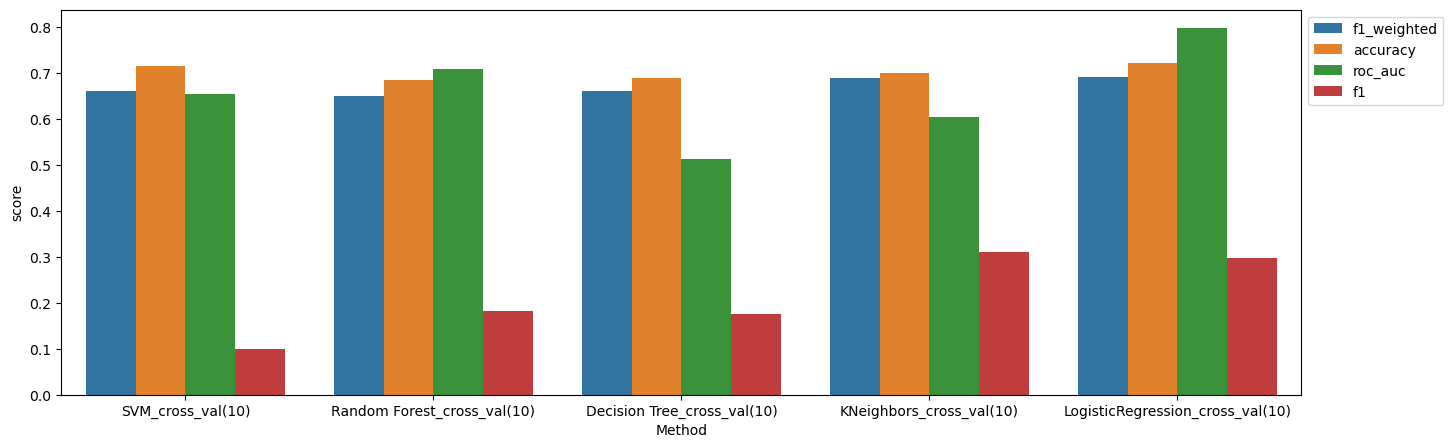

,Method,metrics,score
0,SVM_cross_val(10),f1_weighted,0.661
1,Random Forest_cross_val(10),f1_weighted,0.650
2,Decision Tree_cross_val(10),f1_weighted,0.661
3,KNeighbors_cross_val(10),f1_weighted,0.690
4,LogisticRegression_cross_val(10),f1_weighted,0.693
5,SVM_cross_val(10),accuracy,0.717
6,Random Forest_cross_val(10),accuracy,0.685
7,Decision Tree_cross_val(10),accuracy,0.690
8,KNeighbors_cross_val(10),accuracy,0.701
9,LogisticRegression_cross_val(10),accuracy,0.722


In [74]:
threshold_list = [1,2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15]

for number in threshold_list:
    
    skf = StratifiedKFold(n_splits=number_of_folds)
    skf.get_n_splits(X_class_dict[f"threshold_{number}"], Y_class_dict[f"threshold_{number}"])

    my_dictionary = {}
    metrics = ['f1_weighted', 'accuracy', 'roc_auc', 'f1']

    #Corr_Var_methos_saved_features_dict[f"threshold_{number}"]: SELECTED FEATURES BASED ON SMALL DATASET (each threshold has its own features)
    #ompF_features: SELECTED FEATURES BASED ON OMF_features (first implemented approach)

    explored_set_features = ompF_features  #change if want to explore another set 

    selected_features_mod = []
    for features_all in X_class_dict[f"threshold_{number}"].columns.tolist():
        if features_all in explored_set_features:
            selected_features_mod.append(features_all)
    if "FormalCharge" not in selected_features_mod:
      selected_features_mod.insert(0, "FormalCharge")

#    selected_features_mod = selected_features_mod + alvadesc_feach.columns.tolist()[2:]

    print("Selected features: ", len(selected_features_mod))
    print(selected_features_mod)

    for name, model in models:
    
        scores = cross_validate(model, X_class_dict[f"threshold_{number}"][selected_features_mod],
                            Y_class_dict[f"threshold_{number}"], cv=skf, scoring=metrics)

        #boxplot for accuracy and f1
        #values = [name, number, 'Accuracy'] + scores['test_accuracy'].tolist()
        #boxplot_cross_val.loc[len(boxplot_cross_val)] = values

        values_f1 = [name, number, 'f1'] + scores['test_f1'].tolist()
        boxplot_cross_val.loc[len(boxplot_cross_val)] = values_f1

        #values_f1_weited = [name, number, 'f1_weited'] + scores['test_f1_weighted'].tolist()
        #boxplot_cross_val.loc[len(boxplot_cross_val)] = values_f1_weited

        dict_list = []
        for type_score in ['test_f1_weighted', 'test_accuracy', 'test_roc_auc', 'test_f1']:
            variable = round(scores[type_score].mean(), 3) 
            dict_list.append(variable)


        my_dictionary[name + "_"  + 'cross_val(10)'] = dict_list

    cross_val = pd.DataFrame.from_dict(my_dictionary, orient='index',
                       columns=['f1_weighted', 'accuracy', 'roc_auc', 'f1'])

    new_cross_val = cross_val.rename_axis('Method').reset_index()

    melt_cross_val = pd.melt(
        new_cross_val, 
        id_vars= ['Method'],
        value_vars=('f1_weighted','accuracy', 'roc_auc', 'f1'), 
        var_name='metrics', 
        value_name='score', 
        col_level=None
        )
    
#melt_cross_val

plt.rcParams["figure.figsize"] = [16,5]
sns.barplot(data = melt_cross_val, x = 'Method', y = 'score', hue = 'metrics')
plt.legend(loc='upper left', bbox_to_anchor=(1, 1))
plt.show()
melt_cross_val

In [75]:
boxplot_cross_val

,Model,Threshold,Metric,fold_1,fold_2,fold_3,fold_4,fold_5,fold_6,fold_7
0,SVM,1,f1,0.380952,0.000000,0.285714,0.000000,0.000000,0.00,0.000000
1,Random Forest,1,f1,0.384615,0.000000,0.200000,0.000000,0.545455,0.00,0.000000
2,Decision Tree,1,f1,0.320000,0.153846,0.000000,0.400000,0.500000,0.00,0.400000
3,KNeighbors,1,f1,0.416667,0.375000,0.400000,0.769231,0.444444,0.00,0.285714
4,LogisticRegression,1,f1,0.363636,0.363636,0.000000,0.000000,0.000000,0.00,0.000000
...,...,...,...,...,...,...,...,...,...,...
70,SVM,15,f1,0.333333,0.363636,0.000000,0.000000,0.000000,0.00,0.000000
71,Random Forest,15,f1,0.260870,0.166667,0.200000,0.400000,0.250000,0.00,0.000000
72,Decision Tree,15,f1,0.333333,0.166667,0.333333,0.000000,0.400000,0.00,0.000000
73,KNeighbors,15,f1,0.400000,0.266667,0.000000,0.500000,0.500000,0.25,0.250000


,Model,Threshold,Metric,folds_names,value
0,SVM,1,f1,fold_1,0.380952
1,Random Forest,1,f1,fold_1,0.384615
2,Decision Tree,1,f1,fold_1,0.320000
3,KNeighbors,1,f1,fold_1,0.416667
4,LogisticRegression,1,f1,fold_1,0.363636
...,...,...,...,...,...
520,SVM,15,f1,fold_7,0.000000
521,Random Forest,15,f1,fold_7,0.000000
522,Decision Tree,15,f1,fold_7,0.000000
523,KNeighbors,15,f1,fold_7,0.250000


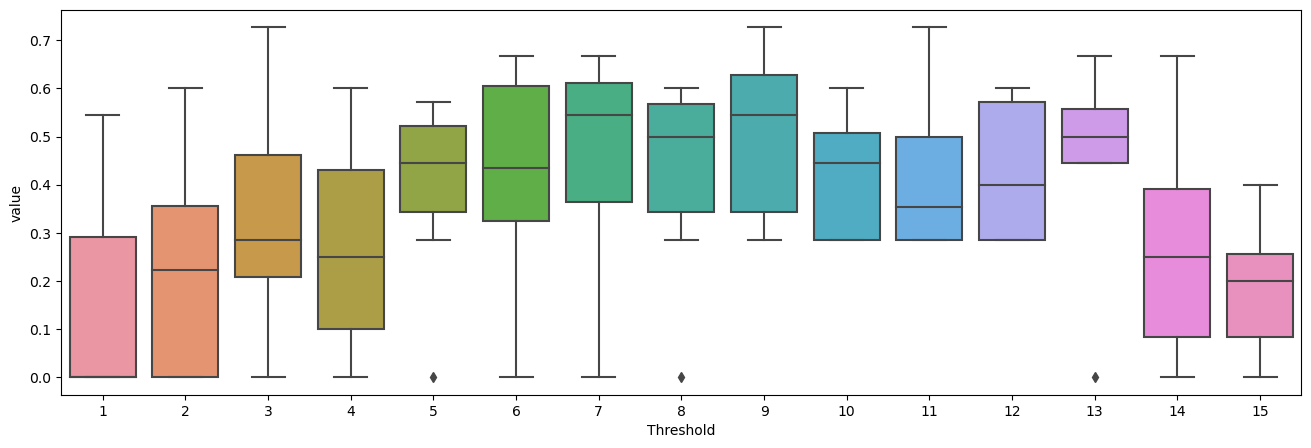

In [77]:
melt_boxplot = pd.melt(
        boxplot_cross_val, 
        id_vars= ['Model', 'Threshold', "Metric"],
        value_vars=(folds_names), 
        var_name='folds_names', 
        value_name='value', 
        col_level=None
        )
pp = melt_boxplot[melt_boxplot['Model'] == 'Random Forest']

sns.boxplot(data=pp, x="Threshold", y="value")
#, hue="Metric")
#sns.stripplot(x = "Threshold", y = "value", color = 'black', alpha = 0.8, data = pp)
melt_boxplot

## Vlidation

ITERATION:  1


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


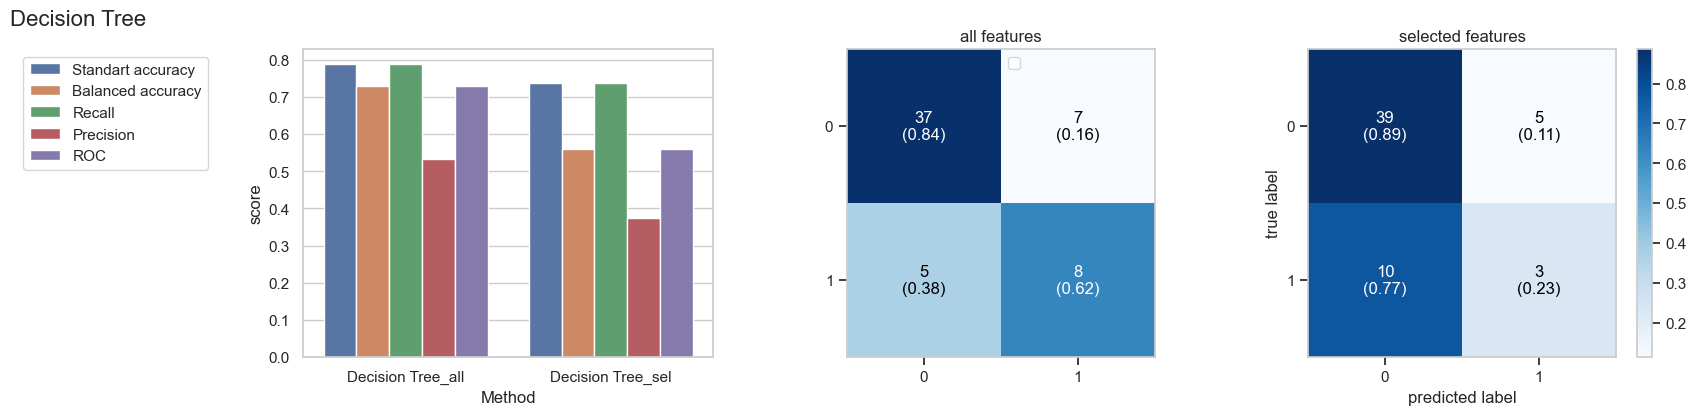

|--- feature_3 <= 0.36
|   |--- feature_0 <= 0.21
|   |   |--- feature_1 <= -0.00
|   |   |   |--- feature_12 <= -0.26
|   |   |   |   |--- class: 1
|   |   |   |--- feature_12 >  -0.26
|   |   |   |   |--- class: 0
|   |   |--- feature_1 >  -0.00
|   |   |   |--- class: 0
|   |--- feature_0 >  0.21
|   |   |--- feature_2 <= -1.07
|   |   |   |--- feature_2 <= -1.19
|   |   |   |   |--- class: 0
|   |   |   |--- feature_2 >  -1.19
|   |   |   |   |--- feature_13 <= 0.08
|   |   |   |   |   |--- class: 1
|   |   |   |   |--- feature_13 >  0.08
|   |   |   |   |   |--- class: 0
|   |   |--- feature_2 >  -1.07
|   |   |   |--- feature_11 <= 0.17
|   |   |   |   |--- class: 0
|   |   |   |--- feature_11 >  0.17
|   |   |   |   |--- feature_1 <= 0.51
|   |   |   |   |   |--- class: 1
|   |   |   |   |--- feature_1 >  0.51
|   |   |   |   |   |--- feature_8 <= -0.01
|   |   |   |   |   |   |--- class: 0
|   |   |   |   |   |--- feature_8 >  -0.01
|   |   |   |   |   |   |--- class: 1
|--- fe

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


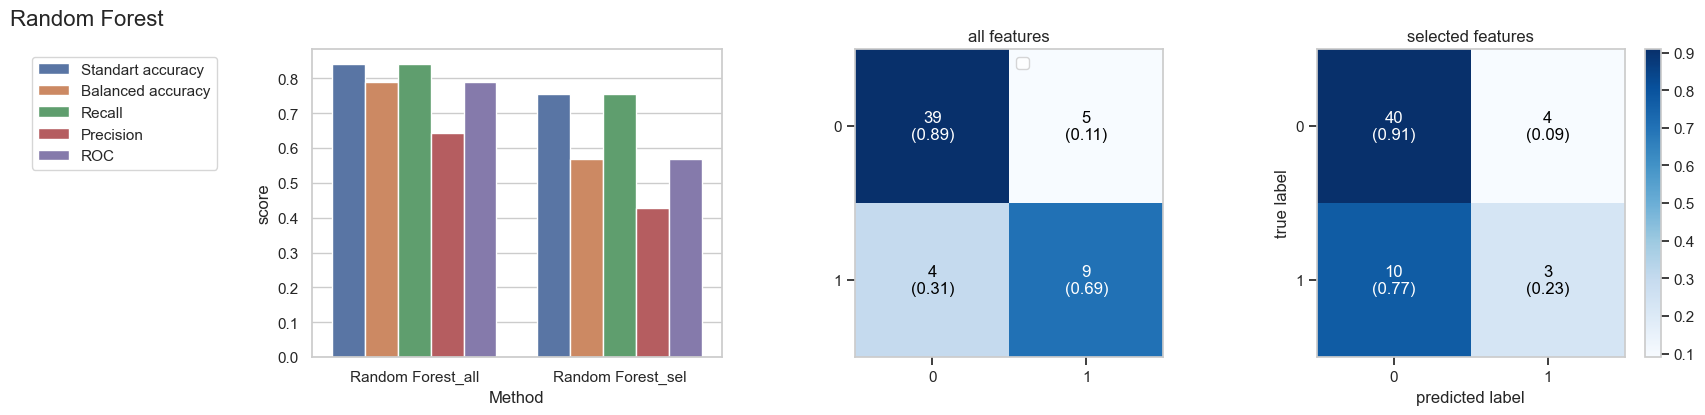

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


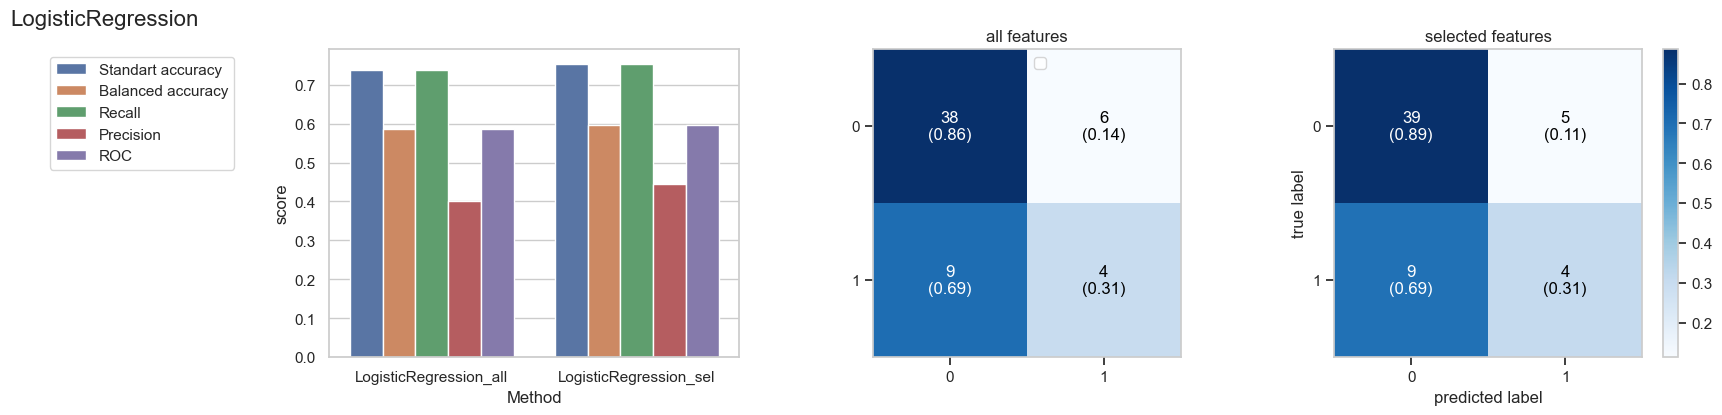

<AxesSubplot:xlabel='Method', ylabel='score'>

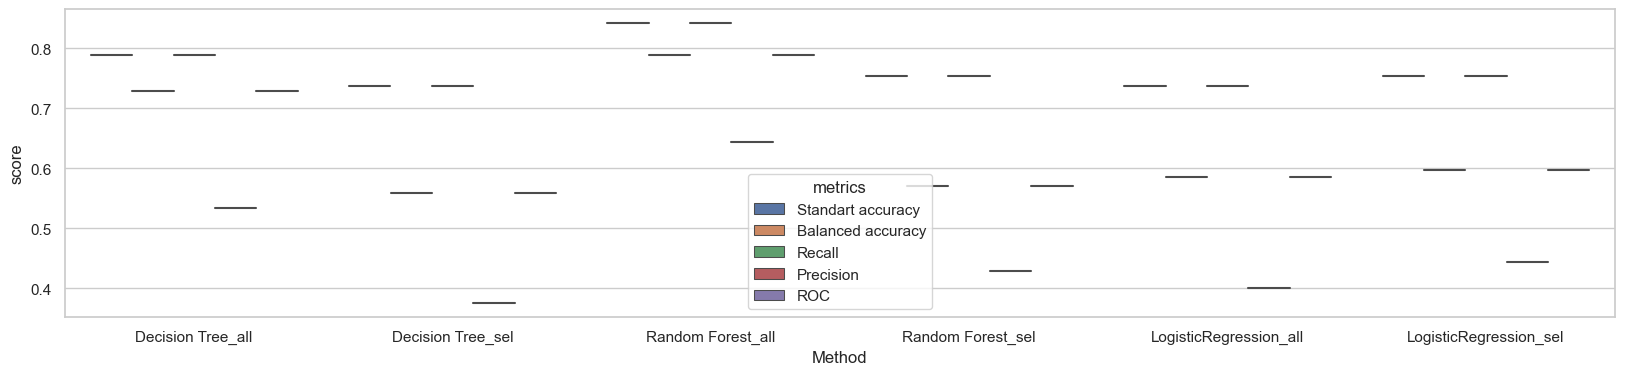

In [289]:
number_of_iterations = 1
test_size_val = 0.3
threshold  = [12]
checked_model = [['Decision Tree', DecisionTreeClassifier()], ['Random Forest', RandomForestClassifier()], ['LogisticRegression', LogisticRegression()]]

validation_table = pd.DataFrame(columns=['Method', 'Iteration', 'Standart accuracy', 'Balanced accuracy', 'Recall', 'Precision', 'ROC'])
validation_table

models_validations = [['SVM', svm.SVC()],           
          ['Random Forest', RandomForestClassifier()], 
          ['Decision Tree', DecisionTreeClassifier()],
          ['KNeighbors', KNeighborsClassifier()], 
          ['LogisticRegression', LogisticRegression()]
          ]

#def confusion_matrix_function(XXX, yyy, selected_features_mod, test_size):

for iter in range(number_of_iterations):   
    print("ITERATION: ", iter + 1 )
    for number in threshold:
        X_train, X_test, y_train, y_test = train_test_split(X_class_dict[f"threshold_{number}"], 
                                                        Y_class_dict[f"threshold_{number}"], test_size=test_size_val, 
                                                        stratify=Y_class_dict[f"threshold_{number}"], shuffle = True)
        #print(test_size_x)
        
        select_features_val = []
        for features_all in X_class_dict[f"threshold_{number}"].columns.tolist():
            if features_all in ompF_features:
                select_features_val.append(features_all)

        select_features_val.append("FormalCharge")
    #    print("Selected features: ", len(select_features_val))
    #    print(select_features_val)

        for name, classifier in checked_model:
            #print(name)
            model = classifier
            model.fit(X_train, y_train)
            preds = model.predict(X_test)
            confmat = confusion_matrix(y_test, preds)

            #confusion matrix
            fig, axes = plt.subplots(1, 3, figsize=(18, 4))
            fig.suptitle(name, fontsize=16, x = 0)

            plot_confusion_matrix(conf_mat=confmat,
                                    show_absolute=True,
                                    show_normed=True,
                                    colorbar=False, axis = axes[1], figure = fig)
        

            #model with selected features

            X_train_sel = X_train[select_features_val]   
            X_test_sel = X_test[select_features_val] 

            model1 = classifier
            model1.fit(X_train_sel, y_train)
            preds_sel = model1.predict(X_test_sel)
            confmat_sel = confusion_matrix(y_test, preds_sel)
    
            plot_confusion_matrix(conf_mat=confmat_sel,
                                    show_absolute=True,
                                    show_normed=True,
                                    colorbar=True, axis = axes[2], figure = fig )  
            
            #other metrics

            #standart accuracy 
            accuracy_all = round(accuracy_score(y_test, preds), 3)
            accuracy_sel = round(accuracy_score(y_test, preds_sel), 3)

            #balanced accuracy
            bal_acc_all = round(balanced_accuracy_score(y_test,preds), 3)
            bal_acc_sel = round(balanced_accuracy_score(y_test,preds_sel), 3)

            #recall
            recall_score_all = round(recall_score(y_test, preds, average='weighted'), 3)
            recall_score_sel = round(recall_score(y_test, preds_sel, average='weighted'), 3)

            #precision
            precision_all = round(precision_score(y_test, preds, zero_division = 1), 3)
            precision_sel = round(precision_score(y_test, preds_sel, zero_division = 1), 3)

            #ROC
            ROC_all = round(roc_auc_score(y_test, preds), 3)
            ROC_sel = round(roc_auc_score(y_test, preds_sel), 3)

            dict_metrics = {}
            dict_metrics[name + "_all"] = iter + 1, accuracy_all, bal_acc_all, recall_score_all, precision_all, ROC_all
            dict_metrics[name + "_sel"] = iter + 1, accuracy_sel, bal_acc_sel, recall_score_sel, precision_sel, ROC_sel

            metrics_dataframe = pd.DataFrame.from_dict(dict_metrics, orient='index',
                        columns=['Iteration', 'Standart accuracy', 'Balanced accuracy', 'Recall', 'Precision', 'ROC'])
            new_metrics_dataframe = metrics_dataframe.rename_axis('Method').reset_index()
            
            validation_table = pd.concat([validation_table, new_metrics_dataframe])
            
            melt_train_test = pd.melt(new_metrics_dataframe, 
                                    id_vars= ['Method'], 
                                    value_vars=('Standart accuracy', 'Balanced accuracy', 'Recall', 'Precision', 'ROC'), 
                                    var_name='metrics', 
                                    value_name='score', 
                                    col_level=None
                                    )
           # print(melt_train_test)


            param = sns.barplot(data = melt_train_test, x = 'Method', y = 'score', hue = 'metrics', ax = axes[0])
            param.legend(loc='upper left', bbox_to_anchor=(-0.7, 1))
            plt.legend(loc='upper left', bbox_to_anchor=(-1, 1))
            


            #print('Standart accuracy', accuracy_all, accuracy_sel)
            #print('Balanced accuracy', bal_acc_all, bal_acc_sel)
            #print('F1 score', f1_score_all, f1_score_sel)
            #print('Precision', precision_all, precision_sel) 
            #print('ROC', ROC_all, ROC_sel) 
            #print(dict_metrics)

            
            
            axes[1].set_title('all features')
            axes[2].set_title('selected features')

            plt.show()
            
            if ((name == 'Decision Tree') and (precision_sel > 0.1)):
                text_representation = tree.export_text(model)
                print(text_representation)
                #print('Sasha')

            
melt_train_test_val = pd.melt(validation_table, 
                        id_vars= ['Method', 'Iteration'], 
                                    value_vars=('Standart accuracy', 'Balanced accuracy', 'Recall', 'Precision', 'ROC'), 
                                    var_name='metrics', 
                                    value_name='score', 
                                    col_level=None
                                    )

sns.set(style = 'whitegrid')
plt.figure(figsize=(20,4))
sns.violinplot(x ='Method', y ='score', hue = 'metrics', 
                   data = melt_train_test_val,
                   inner="points")

## Linear Regression models

In [218]:
#regrassion model
X_class_dict_lin = dict()
Y_class_dict_lin = dict()

for number in threshold_list:

    X_class_dict_lin[f"threshold_{number}"] = docking_interaction_dict[f"threshold_{number}"].drop(['Canonical SMILES', 'name', 'Permeability coefficient', 'Accumulation_class', 'Permiation'], axis= 1)
    Y_class_dict_lin[f"threshold_{number}"] = docking_interaction_dict[f"threshold_{number}"]['Permeability coefficient']

In [264]:
models_lin = [['LinearRegression', LinearRegression()], 
          ['DecisionTreeRegression', DecisionTreeRegressor()], 
          ['RandomForestRegression', RandomForestRegressor()],
          ]

def regression_function(XXX, yyy, selected_features_mod, test_size):
    dict_test_train = {}
    for test_size_x in [test_size]:
        X_train, X_test, y_train, y_test = train_test_split(XXX, 
                                                        yyy, test_size=test_size_x, 
                                                        shuffle = True)
        #print(test_size_x)

        for name, classifier in models_lin:
            metrics_lin = pd.DataFrame(columns=['y_test', 'preds', 'preds_sel'])
            metrics_lin['y_test'] = y_test
            model = classifier
            model.fit(X_train, y_train)
            preds = model.predict(X_test)
            metrics_lin['preds'] = preds
            
            
            X_train_sel = X_train[selected_features_mod]   
            X_test_sel = X_test[selected_features_mod] 

            model1 = classifier
            model1.fit(X_train_sel, y_train)
            preds_sel = model1.predict(X_test_sel)
            metrics_lin['preds_sel'] = preds_sel
            
            #plot
            fig, axes = plt.subplots(1, 2, figsize=(12, 4))
            fig.suptitle(name, fontsize=16, x = 0)
            
            sns.scatterplot(data=metrics_lin, x="preds", y="y_test", ax = axes[0])
            sns.scatterplot(data=metrics_lin, x="preds_sel", y="y_test", ax = axes[1])
            axes[0].set_title(f'all features, R2 = {r2_score(y_test, preds)}')
            axes[1].set_title(f'selected features, R2 = {r2_score(y_test, preds_sel)}')
            

Selected features:  28
['res:A132 coul', 'res:A113 hbond', 'res:A16 dist', 'A:113(ASP) HDonor nc', 'A:113(ASP) Salt', 'A:132(ARG) HAccep cn', 'A:132(ARG) HAccep nn', 'A:132(ARG) Salt', 'A:16(LYS) HAccep cn', 'A:310(TYR) HPhob', 'A:40(TYR) HPhob', 'A:42(ARG) HAccep cn', 'A:42(ARG) HAccep nn', 'A:82(ARG) HAccep cn', 'A:82(ARG) HAccep nn', 'A:82(ARG) HAccep nc', 'A:82(ARG) Salt', 'FormalCharge', 'qpmax', 'qnmax', 'Qpos', 'Qneg', 'Qtot', 'Qmean', 'Q2', 'RPCG', 'RNCG', 'PCWTE1']


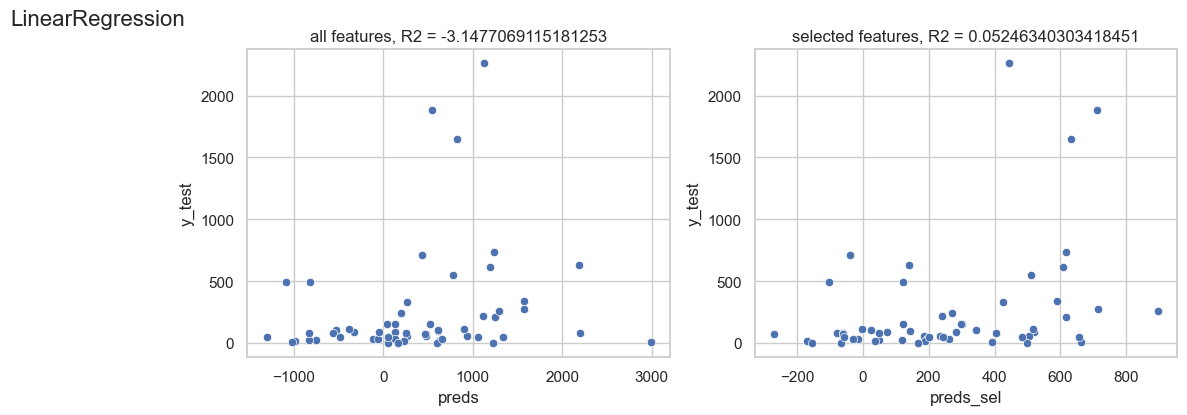

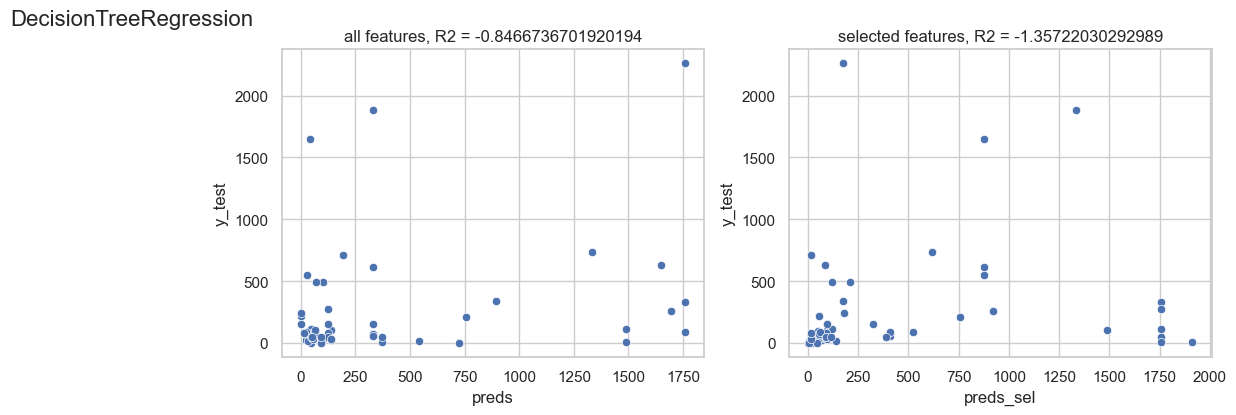

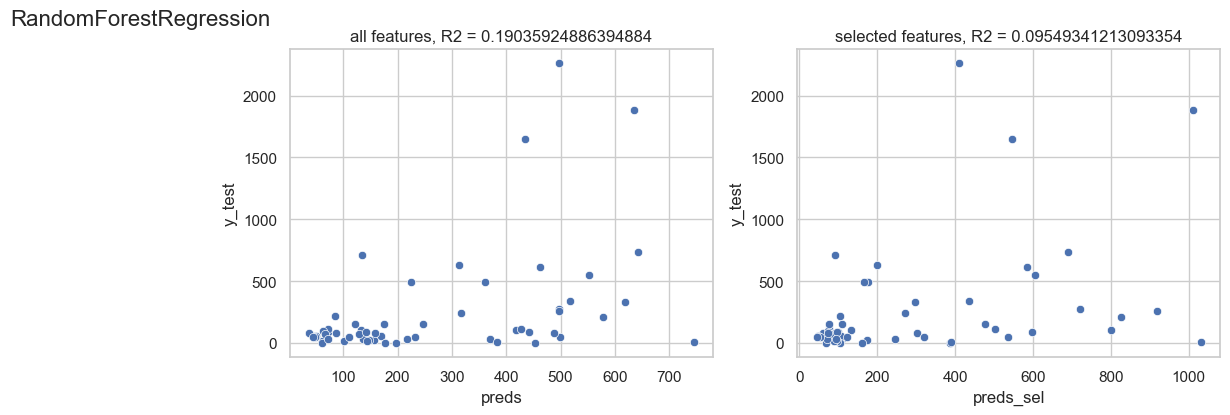

In [266]:
selected_treshold_lin = [14]
for number in selected_treshold_lin:
#    select_features = X_class_dict[f"threshold_{number}"].drop(Corr_methos_deleted_features_dict[f"threshold_{number}"], axis= 1).columns.tolist()
    #.drop(Corr_methos_deleted_features_dict[f"threshold_{number}"], axis= 1).columns.tolist()

    select_features = []
    for features_all in X_class_dict_lin[f"threshold_{number}"].columns.tolist():
        if features_all in ompF_features:
            select_features.append(features_all)

    select_features.append("FormalCharge")
    select_features = select_features + alvadesc_feach.columns.tolist()[2:]
    print("Selected features: ", len(select_features))
    print(select_features)
    
    regression_function(X_class_dict_lin[f"threshold_{number}"], Y_class_dict_lin[f"threshold_{number}"], select_features, 0.3)

In [35]:
models

[['SVM', SVC()],
 ['Random Forest', RandomForestClassifier(random_state=42)],
 ['Decision Tree', DecisionTreeClassifier(random_state=42)],
 ['KNeighbors', KNeighborsClassifier()],
 ['LogisticRegression', LogisticRegression(random_state=42)]]

In [58]:
models_test = [ 
          ['Decision Tree', DecisionTreeClassifier(random_state=42)], 
          ]

In [63]:
def grid_search_function(XXX, yyy, test_size):
    dict_test_train = {}
    for test_size_x in [test_size]:
        X_train, X_test, y_train, y_test = train_test_split(XXX, 
                                                        yyy, test_size=test_size, 
                                                        random_state=42, stratify=yyy, shuffle = True)

        param_grid = [{'max_depth': [1, 2, 3, 4, 5, 6, None],
               'criterion': ['gini', 'entropy']}]
        
        for name, classifier in models_test:
            gs = GridSearchCV(estimator=classifier,
                  param_grid=param_grid,
                  refit=True,
                  cv=10,
                  n_jobs=None)

            gs.fit(X_train, y_train)

            print('Best Accuracy: %.2f%%' % (gs.best_score_*100))
            print('Best Params:', gs.best_params_)

            # gs.best_estimator_.fit(X_train, y_train)
            print('Accuracy: %.2f%%' % (gs.best_estimator_.score(X_test, y_test)*100))

            grid = np.zeros((2, 7))
            grid[0, :] = gs.cv_results_['mean_test_score'][:7]
            grid[1, :] = gs.cv_results_['mean_test_score'][7:]


            heatmap(grid, 
                    column_names=[1, 2, 3, 4, 5, 6, "None"], 
                    row_names=['gini', 'entropy'])
            plt.ylabel('Criterion')
            plt.xlabel('Max depth')
            plt.show()


Best Accuracy: 77.69%
Best Params: {'criterion': 'entropy', 'max_depth': 1}
Accuracy: 77.19%


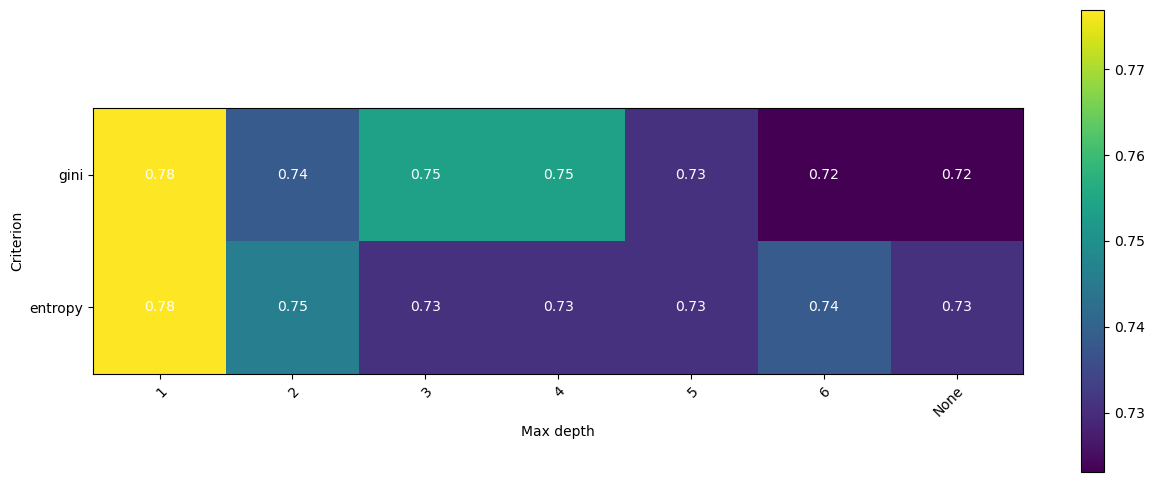

In [66]:
selected_treshold = [2]
for number in selected_treshold:
    grid_search_function(X_class_dict[f"threshold_{number}"], Y_class_dict[f"threshold_{number}"], 0.3)

In [ ]:
grid_search_function(XXX, yyy, test_size)

In [ ]:
def grid_search_function(XXX, yyy, selected_features_mod, test_size):
    dict_test_train = {}
    for test_size_x in [test_size]:
        X_train, X_test, y_train, y_test = train_test_split(XXX, 
                                                        yyy, test_size=test_size, 
                                                        random_state=42, stratify=yyy, shuffle = True)
        #print(test_size_x)

        for name, classifier in models:
            #print(name)
            model = classifier
            model.fit(X_train, y_train)
            preds = model.predict(X_test)
            confmat = confusion_matrix(y_test, preds)

            #confusion matrix
            fig, axes = plt.subplots(1, 3, figsize=(17, 4))
            fig.suptitle(name, fontsize=16, x = 0.95)

            plot_confusion_matrix(conf_mat=confmat,
                                    show_absolute=True,
                                    show_normed=True,
                                    colorbar=False, axis = axes[0], figure = fig)
        

            #model with selected features

            X_train_sel = X_train[selected_features_mod]   
            X_test_sel = X_test[selected_features_mod] 

            model1 = classifier
            model1.fit(X_train_sel, y_train)
            preds_sel = model1.predict(X_test_sel)
            confmat_sel = confusion_matrix(y_test, preds_sel)
    
            plot_confusion_matrix(conf_mat=confmat_sel,
                                    show_absolute=True,
                                    show_normed=True,
                                    colorbar=True, axis = axes[1], figure = fig )  
            
            #other metrics

            #standart accuracy 
            accuracy_all = round(accuracy_score(y_test, preds), 3)
            accuracy_sel = round(accuracy_score(y_test, preds_sel), 3)

            #balanced accuracy
            bal_acc_all = round(balanced_accuracy_score(y_test,preds), 3)
            bal_acc_sel = round(balanced_accuracy_score(y_test,preds_sel), 3)

            #f1 score
            f1_score_all = round(f1_score(y_test, preds), 3)
            f1_score_sel = round(f1_score(y_test, preds_sel), 3)

            #precision
            precision_all = round(precision_score(y_test, preds, zero_division = 1), 3)
            precision_sel = round(precision_score(y_test, preds_sel, zero_division = 1), 3)

            #ROC
            ROC_all = round(roc_auc_score(y_test, preds), 3)
            ROC_sel = round(roc_auc_score(y_test, preds_sel), 3)

            dict_metrics = {}
            dict_metrics[name + "_all"] = accuracy_all, bal_acc_all, f1_score_all, precision_all, ROC_all
            dict_metrics[name + "_sel"] = accuracy_sel, bal_acc_sel, f1_score_sel, precision_sel, ROC_sel

            metrics_dataframe = pd.DataFrame.from_dict(dict_metrics, orient='index',
                        columns=['Standart accuracy', 'Balanced accuracy', 'F1 score', 'Precision', 'ROC'])
            new_metrics_dataframe = metrics_dataframe.rename_axis('Method').reset_index()
            melt_train_test = pd.melt(new_metrics_dataframe, 
                                    id_vars= ['Method'], 
                                    value_vars=('Standart accuracy', 'Balanced accuracy', 'F1 score', 'Precision', 'ROC'), 
                                    var_name='metrics', 
                                    value_name='score', 
                                    col_level=None
                                    )
            #print(melt_train_test)


            sns.barplot(melt_train_test, x = 'Method', y = 'score', hue = 'metrics', ax = axes[2] )
            plt.legend(loc='upper left', bbox_to_anchor=(1, 1))
            


            #print('Standart accuracy', accuracy_all, accuracy_sel)
            #print('Balanced accuracy', bal_acc_all, bal_acc_sel)
            #print('F1 score', f1_score_all, f1_score_sel)
            #print('Precision', precision_all, precision_sel) 
            #print('ROC', ROC_all, ROC_sel) 
            #print(dict_metrics)

            
            
            axes[0].set_title('all features')
            axes[1].set_title('selected features')

            plt.show()